In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
  # Replace with your actual CSV file path
df = pd.read_csv("finalwine.csv")

# Display dataset overview
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Number of rows and columns
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


First few rows of the dataset:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Quality  
0      9.4     10.0  
1      9.8 

In [2]:
# Check if the file is correctly loaded
if df.empty:
    print("The dataset is empty. Please check the file path or format.")
else:
    print("Dataset successfully loaded.")


Dataset successfully loaded.


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's already loaded as `df` in your notebook)
print("\nInitial dataset shape:", df.shape)

### 1. Handling Missing Values ###
print("\nChecking for missing values:")
print(df.isnull().sum())

# Option 1: Impute missing values with appropriate statistics
# Fill numeric columns with the median
df_filled = df.fillna(df.median())

# Option 2: Drop rows with missing values (if appropriate)
# Uncomment the following line if you'd prefer to drop rows with missing values:
# df_filled = df.dropna()

print(f"Rows after handling missing values: {df_filled.shape[0]}")

### 2. Removing Duplicate Rows ###
print("\nChecking for duplicate rows:")
duplicates = df_filled.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df_cleaned = df_filled.drop_duplicates()
print(f"Rows after removing duplicates: {df_cleaned.shape[0]}")

### 3. Renaming Columns ###
# Ensure column names are consistent (e.g., lowercase, no spaces, or special characters)
df_cleaned.columns = [col.strip().lower().replace(" ", "_") for col in df_cleaned.columns]
print("\nRenamed columns:")
print(df_cleaned.columns)

### 4. Scaling Features ###
# Separate features and target variable
features = df_cleaned.drop(columns=["quality"])  # Assuming "quality" is the target column
target = df_cleaned["quality"]

# Scale the features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine scaled features and target into a new DataFrame
df_transformed = pd.DataFrame(features_scaled, columns=features.columns)
df_transformed["quality"] = target.values

# Final output
print("\nCleaned and scaled dataset (first 5 rows):")
print(df_transformed.head())

# Check final dataset shape
print("\nFinal dataset shape:", df_transformed.shape)



Initial dataset shape: (59820, 12)

Checking for missing values:
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
Quality                  0
dtype: int64
Rows after handling missing values: 59820

Checking for duplicate rows:
Number of duplicate rows: 44469
Rows after removing duplicates: 15351

Renamed columns:
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Cleaned and scaled dataset (first 5 rows):
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.715090          0.145612    -1.662478       -1.119013  -0.212584   
1      -0.5

In [4]:
import pandas as pd

# Assuming df is your dataset
print("Initial dataset shape:", df.shape)

# Check for missing values in each column
print("\nMissing values before handling:")
print(df.isnull().sum())

# Handle missing values based on the column type
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # For numerical columns
        # Fill missing values with the median
        df[column].fillna(df[column].median(), inplace=True)
    else:  # For categorical columns
        # Fill missing values with the mode
        df[column].fillna(df[column].mode()[0], inplace=True)

# Verify if all missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

print("\nDataset shape after handling missing values:", df.shape)


Initial dataset shape: (59820, 12)

Missing values before handling:
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
Quality                  0
dtype: int64

Missing values after handling:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality                 0
dtype: int64

Dataset shape after handling missing values: (59820, 12)



Data Types:
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

Checking for outliers using summary statistics:
       fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   15351.000000      15351.000000  15351.000000    15351.000000   
mean        9.358404          0.641303      0.436854        8.428368   
std         2.738772          0.403116      0.262781        5.834230   
min         3.800000          0.080000      0.000000        0.500000   
25%         7.000000          0.290000      0.250000        2.700000   
50%         8.640000          0.540000      0.380000        7.510000   
75%        11.615000          0.9700

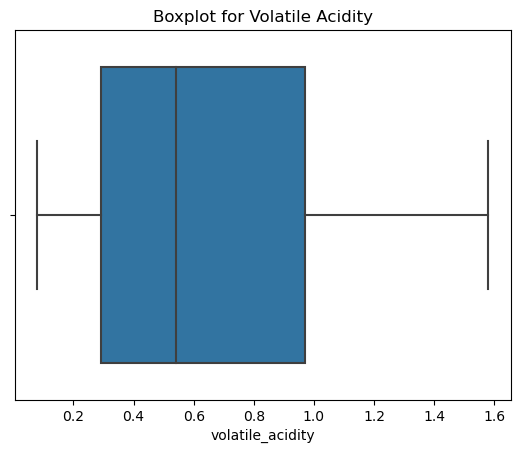


Data after handling outliers in 'volatile_acidity':
(15351, 12)


In [5]:
# Check data types
print("\nData Types:")
print(df_cleaned.dtypes)

# Check for outliers using basic statistics
print("\nChecking for outliers using summary statistics:")
print(df_cleaned.describe())

# Example: Identify potential outliers in 'volatile_acidity'
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_cleaned["volatile_acidity"])
plt.title("Boxplot for Volatile Acidity")
plt.show()

# Handling Outliers (if necessary, e.g., capping extreme values)
q1 = df_cleaned["volatile_acidity"].quantile(0.25)
q3 = df_cleaned["volatile_acidity"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
df_cleaned = df_cleaned[(df_cleaned["volatile_acidity"] >= lower_bound) & 
                        (df_cleaned["volatile_acidity"] <= upper_bound)]
print("\nData after handling outliers in 'volatile_acidity':")
print(df_cleaned.shape)


Summary Statistics:
       fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   59810.000000      59812.000000  59817.000000    59818.000000   
mean        7.845302          0.430645      0.345321        6.031014   
std         2.038321          0.282539      0.193960        5.198742   
min         3.800000          0.080000      0.000000        0.500000   
25%         6.600000          0.240000      0.240000        1.900000   
50%         7.200000          0.330000      0.320000        3.600000   
75%         8.400000          0.540000      0.430000        9.200000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free_sulfur_dioxide  total_sulfur_dioxide       density  \
count  59818.000000         59820.000000          59820.000000  59820.000000   
mean       0.066317            30.412437            115.990664      0.995319   
std        0.043905            18.312017             64.148800      0.003390   
min        

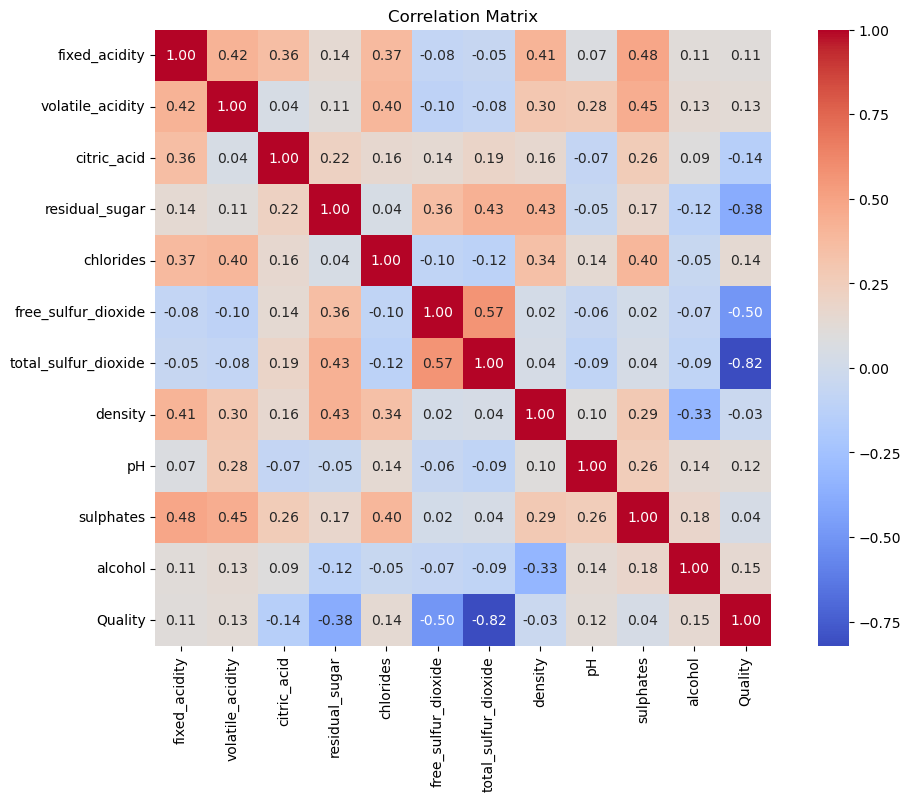

In [6]:
# Import necessary libraries
import pandas as pd

# Load the cleaned dataset
  # Replace with the cleaned dataset path
    
df = pd.read_csv("finalwine.csv")

# Summary statistics for all columns
print("Summary Statistics:")
print(df.describe())

# Count of quality levels
print("\nquality Counts:")
print(df["Quality"].value_counts())

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


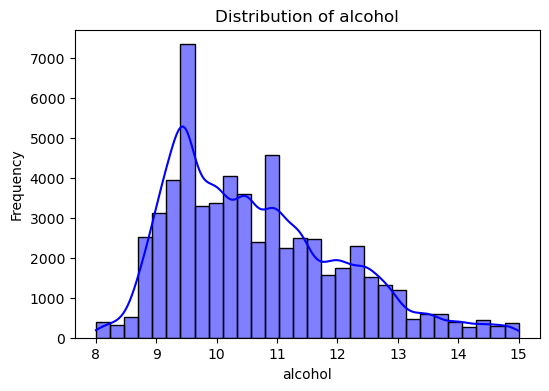

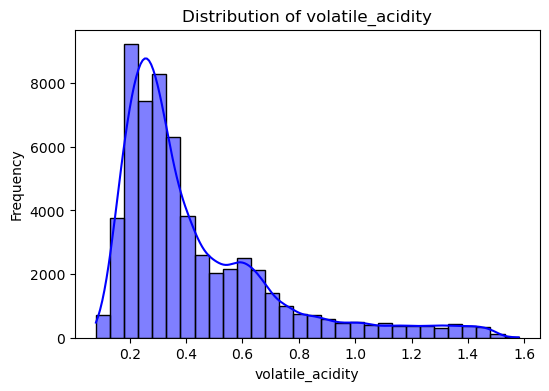

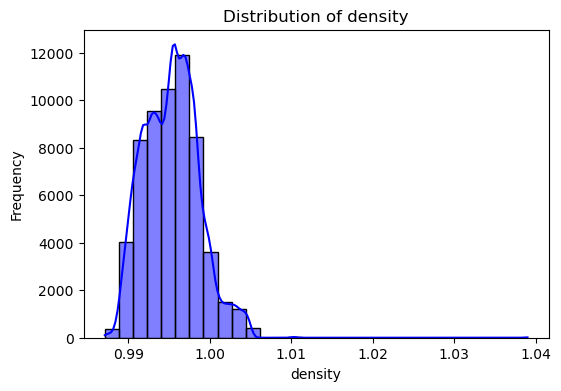

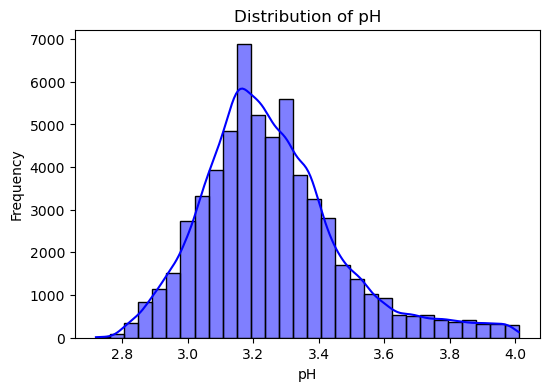

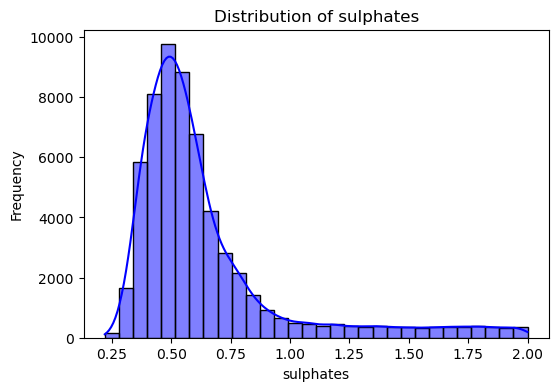

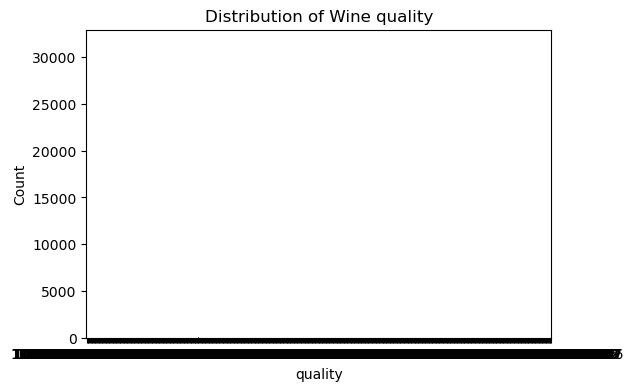

In [7]:
# Visualize distributions for key features
features_to_plot = ["alcohol", "volatile_acidity", "density", "pH", "sulphates"]
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Visualize the target variable (Quality)
plt.figure(figsize=(6, 4))
sns.countplot(x="Quality", data=df, palette="viridis")
plt.title("Distribution of Wine quality")
plt.xlabel("quality")
plt.ylabel("Count")
plt.show()


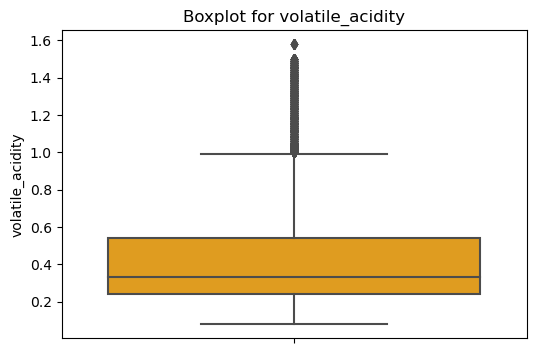

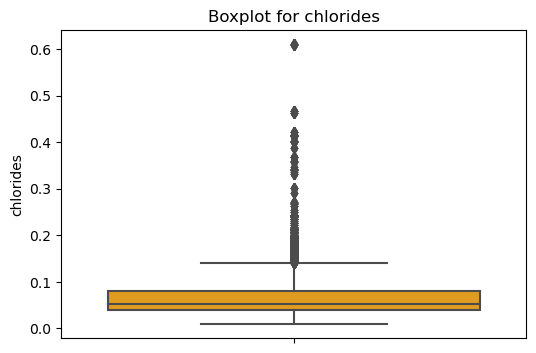

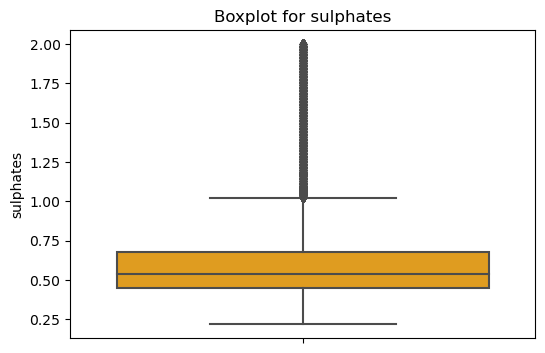

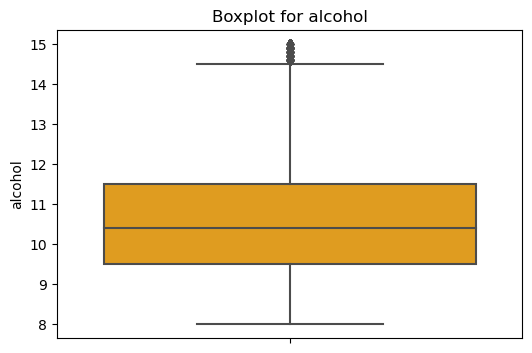

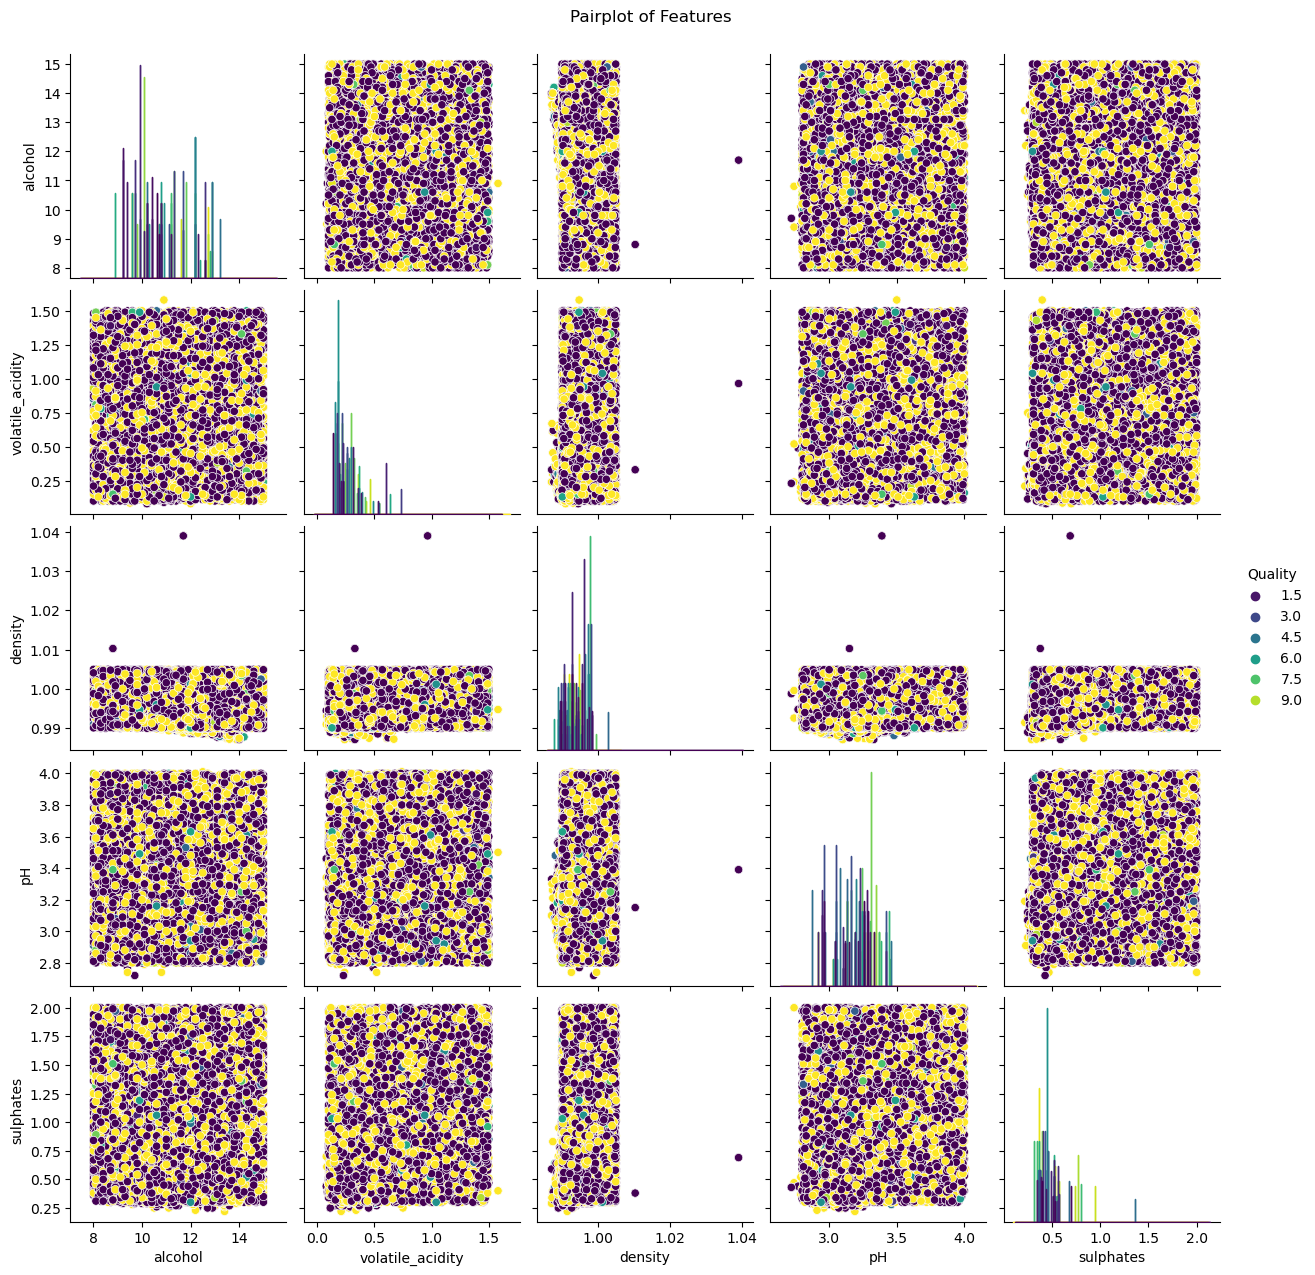

In [8]:
# Boxplots to identify outliers in key features
features_to_check_outliers = ["volatile_acidity", "chlorides", "sulphates", "alcohol"]
for feature in features_to_check_outliers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature], color="orange")
    plt.title(f"Boxplot for {feature}")
    plt.ylabel(feature)
    plt.show()

# Pairplot to identify patterns and outliers between features
sns.pairplot(df, vars=["alcohol", "volatile_acidity", "density", "pH", "sulphates"], hue="Quality", palette="viridis")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


In [9]:
# Calculating correlations with the target variable
correlations_with_quality = df.corr()["Quality"].sort_values(ascending=False)
print("\nCorrelation of features with Quality:")
print(correlations_with_quality)



Correlation of features with Quality:
Quality                 1.000000
alcohol                 0.151145
chlorides               0.143516
volatile_acidity        0.127318
pH                      0.124685
fixed_acidity           0.109706
sulphates               0.037817
density                -0.031746
citric_acid            -0.140057
residual_sugar         -0.382809
free_sulfur_dioxide    -0.497595
total_sulfur_dioxide   -0.821091
Name: Quality, dtype: float64


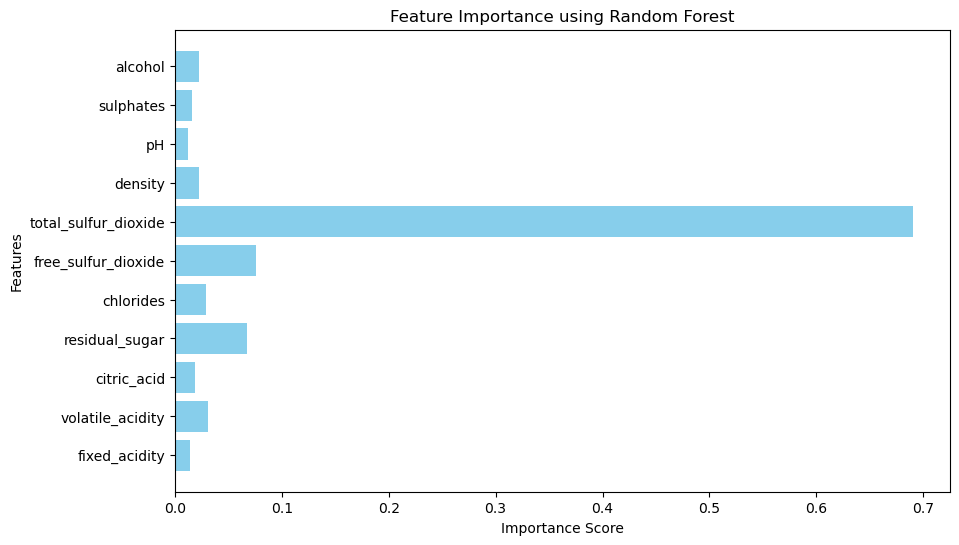

Top 5 selected features: ['residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'alcohol']


In [10]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Handle missing values
imputer = SimpleImputer(strategy="median")  # Replace missing values with median
X = df.drop(columns=["Quality"])  # Features
y = df["Quality"]  # Target

X_imputed = imputer.fit_transform(X)  # Impute missing values
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)  # Convert back to DataFrame

# Ensure the target variable is categorical (convert to integer if needed)
if y.dtype != 'int64':
    y = y.round().astype(int)  # Round off continuous values and convert to integers

# Ensure no missing values remain
assert not np.any(X_imputed.isnull().sum()), "Missing values still present in the data!"

### 1. Feature Importance using Random Forest ###
model = RandomForestClassifier(random_state=42)
model.fit(X_imputed, y)
feature_importances = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color="skyblue")
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### 2. Select Top Features using SelectKBest ###
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_imputed, y)
selected_features = X.columns[selector.get_support()]
print("Top 5 selected features:", list(selected_features))


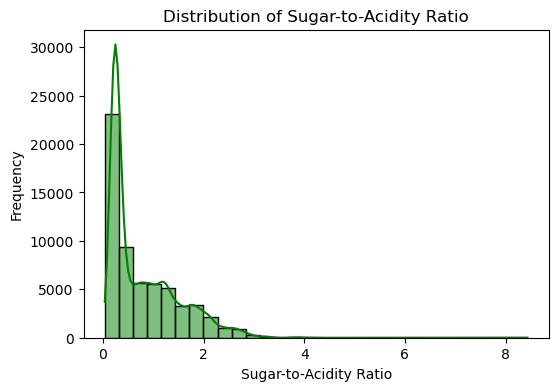

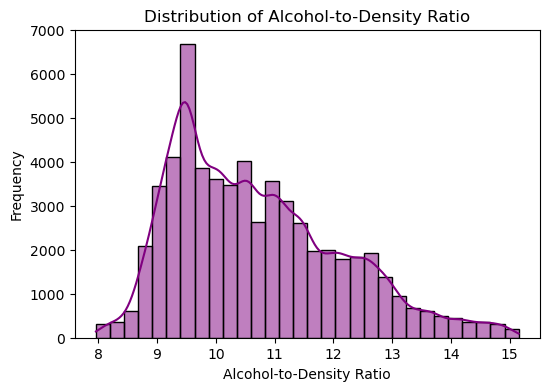

In [11]:
# Create new features
df["sugar_to_acidity_ratio"] = df["residual_sugar"] / (df["fixed_acidity"] + 1e-6)
df["alcohol_density_ratio"] = df["alcohol"] / df["density"]

# Visualize new feature distributions
plt.figure(figsize=(6, 4))
sns.histplot(df["sugar_to_acidity_ratio"], kde=True, bins=30, color="green")
plt.title("Distribution of Sugar-to-Acidity Ratio")
plt.xlabel("Sugar-to-Acidity Ratio")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["alcohol_density_ratio"], kde=True, bins=30, color="purple")
plt.title("Distribution of Alcohol-to-Density Ratio")
plt.xlabel("Alcohol-to-Density Ratio")
plt.ylabel("Frequency")
plt.show()


In [12]:
!pip install lightgbm

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('finalwine.csv')

# Split the data into features (X) and target (y)
X = df.drop('Quality', axis=1)  # Assuming 'Quality' is the target column
y = df['Quality']  # Target column

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, check the shapes of the resulting splits
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (47856, 11)
Test data shape: (11964, 11)


# ML MODELS(4)
# Decision Tree Classifier

Binned training target distribution:
 0    25538
4    20913
3      486
2      483
1      436
Name: Quality, dtype: int64
Binned testing target distribution:
 0    6533
4    5118
2     128
3      93
1      92
Name: Quality, dtype: int64

Decision Tree Accuracy: 0.9911


Classification Report:
               precision    recall  f1-score   support

    Very Low       0.99      1.00      1.00      6533
         Low       0.92      0.83      0.87        92
      Medium       0.88      0.82      0.85       128
        High       0.81      0.89      0.85        93
   Very High       0.99      0.99      0.99      5118

    accuracy                           0.99     11964
   macro avg       0.92      0.91      0.91     11964
weighted avg       0.99      0.99      0.99     11964



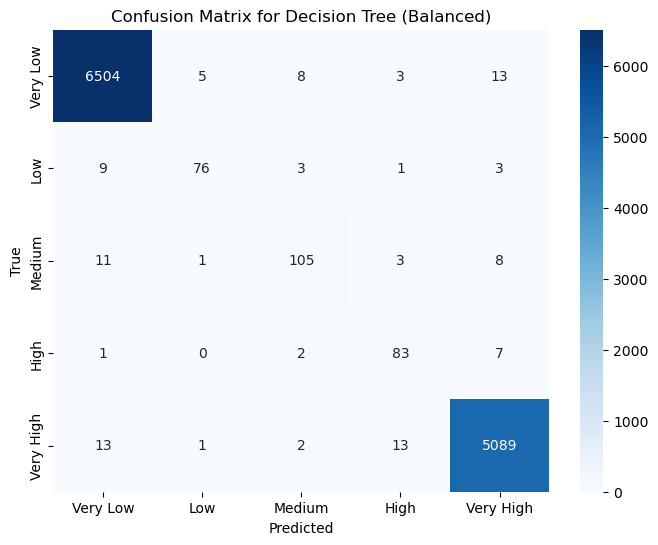

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and class labels for five classes
bins = [0, 3, 5, 7, 9, 10]  # Adjust bin edges based on the dataset's distribution
labels = [0, 1, 2, 3, 4]    # Assign numeric labels (e.g., 0 to 4)

# Binning the target variable into five classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Display the distribution of the binned target variable
print("Binned training target distribution:\n", y_train_binned.value_counts())
print("Binned testing target distribution:\n", y_test_binned.value_counts())

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Decision Tree Classifier with balanced class weights
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train_imputed, y_train_binned)

# Predict on the test dataset
y_pred_dtree = dtree.predict(X_test_imputed)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Evaluate the model
accuracy = accuracy_score(y_test_binned, y_pred_dtree)
print(f"\nDecision Tree Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(y_test_binned, y_pred_dtree, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_dtree)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Decision Tree (Balanced)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


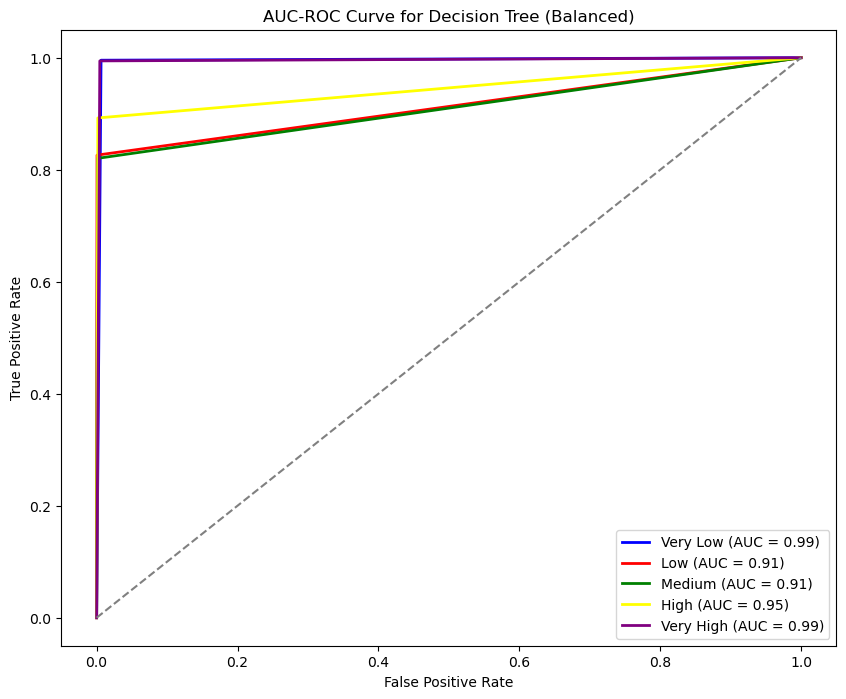

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC
lb = LabelBinarizer()
y_test_binned_bin = lb.fit_transform(y_test_binned)

# Predict probabilities for each class
y_prob_dtree = dtree.predict_proba(X_test_imputed)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple']  # Adjust colors for each class

for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_binned_bin[:, i], y_prob_dtree[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('AUC-ROC Curve for Decision Tree (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


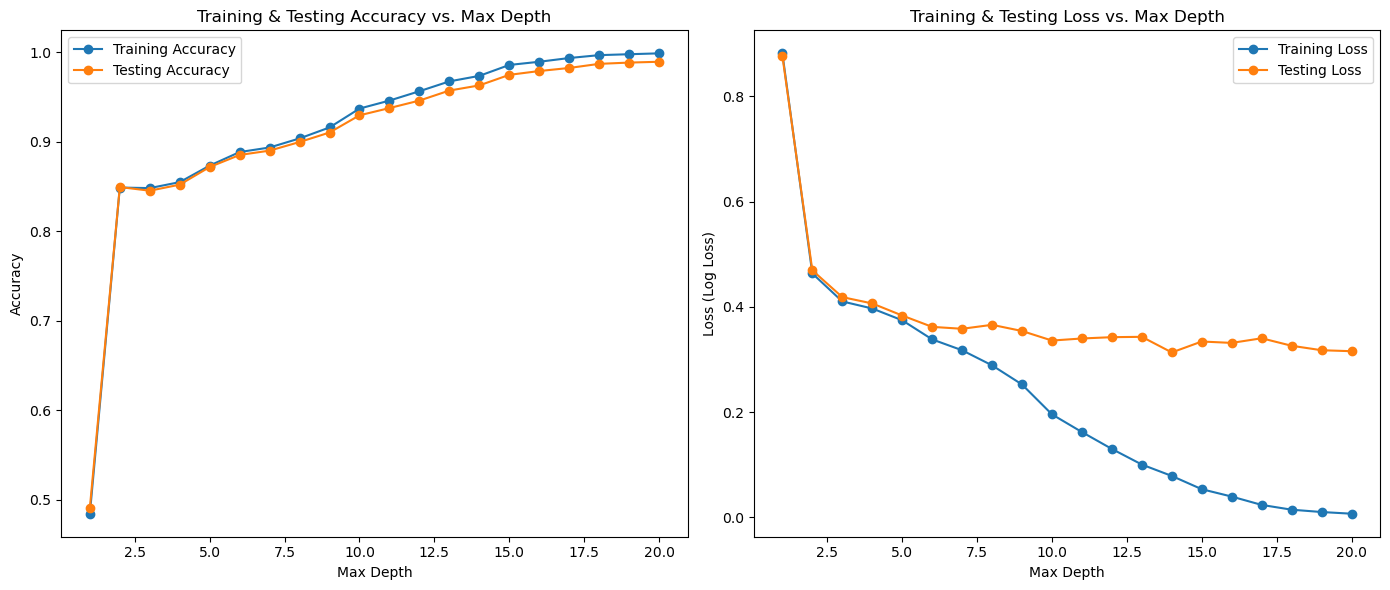

In [17]:
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store training and testing accuracy/loss
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []

# Train Decision Tree Classifier for different depths (or other hyperparameters)
max_depth_values = range(1, 21)  # Adjust max_depth range based on your dataset

for depth in max_depth_values:
    # Create and train the model
    dtree = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
    dtree.fit(X_train_imputed, y_train_binned)
    
    # Make predictions
    y_train_pred = dtree.predict(X_train_imputed)
    y_test_pred = dtree.predict(X_test_imputed)
    
    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train_binned, y_train_pred))
    test_accuracy.append(accuracy_score(y_test_binned, y_test_pred))
    
    # Calculate log loss (Training & Testing Loss)
    train_loss.append(log_loss(y_train_binned, dtree.predict_proba(X_train_imputed)))
    test_loss.append(log_loss(y_test_binned, dtree.predict_proba(X_test_imputed)))

# Plot Training & Testing Accuracy
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training & Testing Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_loss, label='Training Loss', marker='o')
plt.plot(max_depth_values, test_loss, label='Testing Loss', marker='o')
plt.title('Training & Testing Loss vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Loss (Log Loss)')
plt.legend()

plt.tight_layout()
plt.show()


# Random Forest Classifier

Binned training target distribution:
 0    25538
4    20913
3      486
2      483
1      436
Name: Quality, dtype: int64
Binned testing target distribution:
 0    6533
4    5118
2     128
3      93
1      92
Name: Quality, dtype: int64

Random Forest Accuracy: 0.9949


Classification Report:
               precision    recall  f1-score   support

    Very Low       1.00      1.00      1.00      6533
         Low       1.00      0.83      0.90        92
      Medium       1.00      0.82      0.90       128
        High       1.00      0.88      0.94        93
   Very High       0.99      1.00      1.00      5118

    accuracy                           0.99     11964
   macro avg       1.00      0.91      0.95     11964
weighted avg       0.99      0.99      0.99     11964



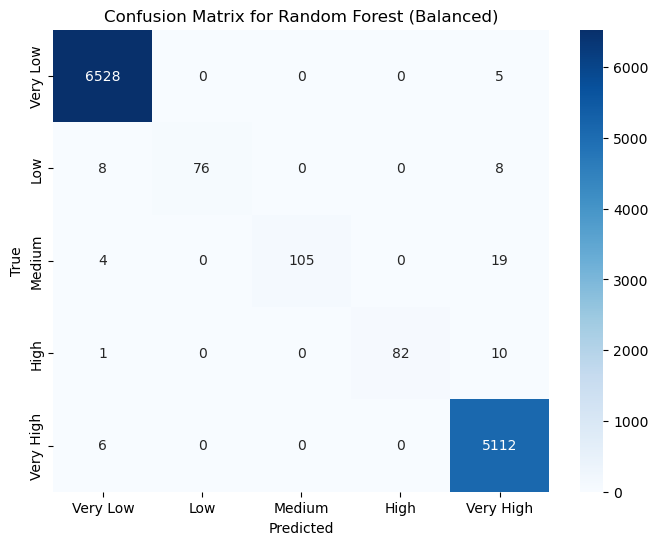

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and class labels for five classes
bins = [0, 3, 5, 7, 9, 10]  # Adjust bin edges based on the dataset's distribution
labels = [0, 1, 2, 3, 4]    # Assign numeric labels (e.g., 0 to 4)

# Binning the target variable into five classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Display the distribution of the binned target variable
print("Binned training target distribution:\n", y_train_binned.value_counts())
print("Binned testing target distribution:\n", y_test_binned.value_counts())

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Random Forest Classifier with balanced class weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_imputed, y_train_binned)

# Predict on the test dataset
y_pred_rf = rf.predict(X_test_imputed)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Evaluate the model
accuracy = accuracy_score(y_test_binned, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(y_test_binned, y_pred_rf, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Random Forest (Balanced)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


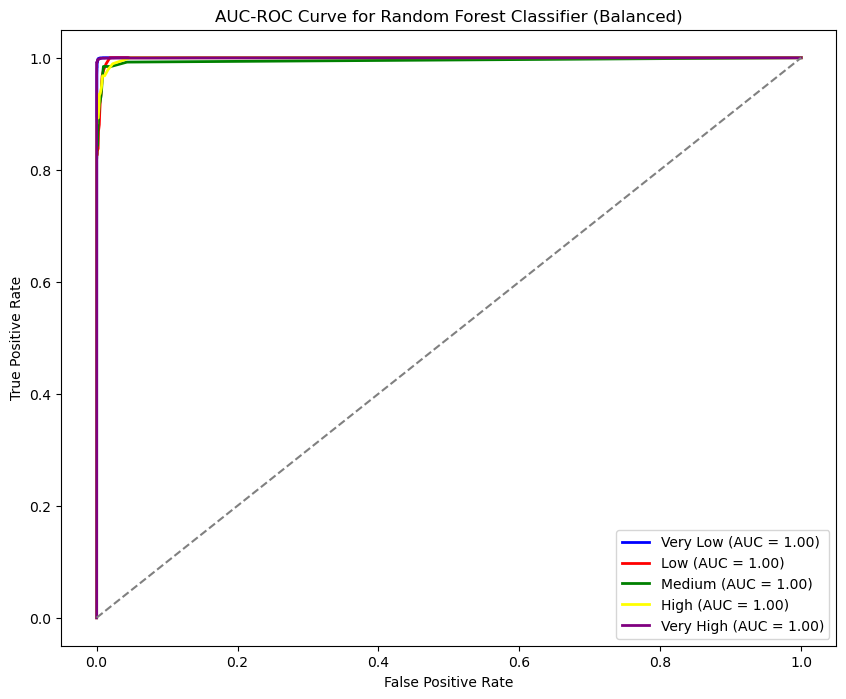

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC
lb = LabelBinarizer()
y_test_binned_bin = lb.fit_transform(y_test_binned)

# Predict probabilities for each class using Random Forest
y_prob_rf = rf.predict_proba(X_test_imputed)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple']  # Adjust colors for each class

for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_binned_bin[:, i], y_prob_rf[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('AUC-ROC Curve for Random Forest Classifier (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


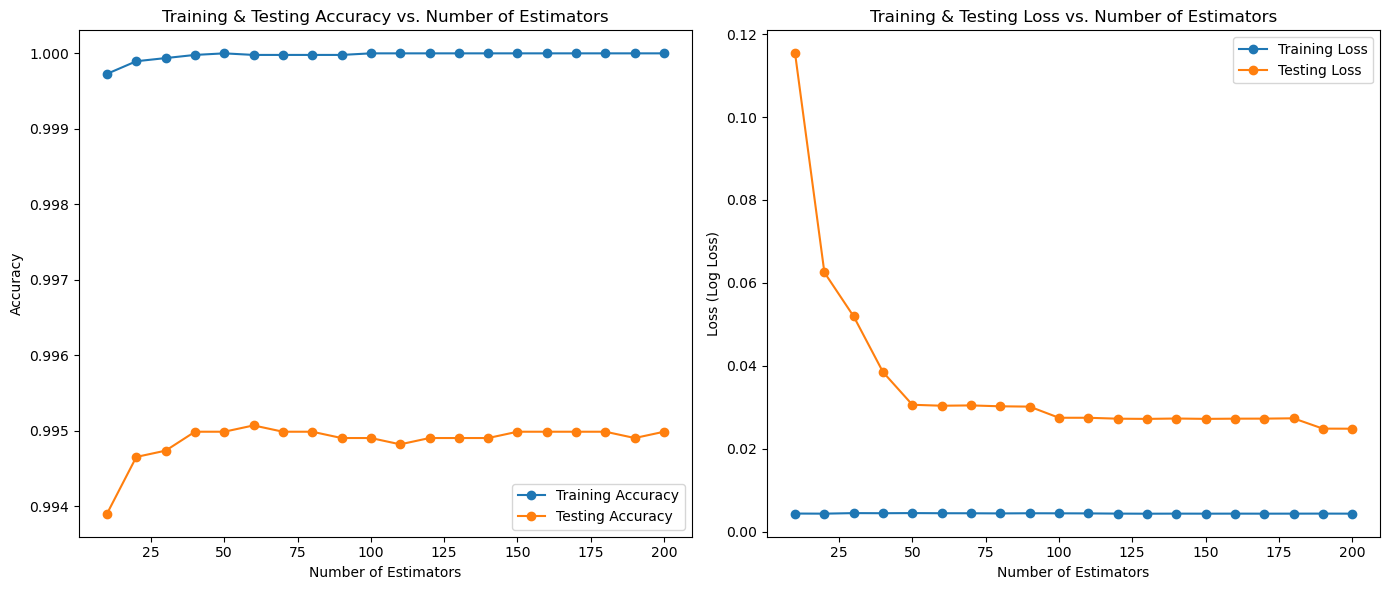

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store training and testing accuracy/loss
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []

# Train Random Forest Classifier for different numbers of estimators
n_estimators_values = range(10, 201, 10)  # Vary number of estimators from 10 to 200

for n_estimators in n_estimators_values:
    # Create and train the model
    rf = RandomForestClassifier(random_state=42, n_estimators=n_estimators, class_weight='balanced')
    rf.fit(X_train_imputed, y_train_binned)
    
    # Make predictions
    y_train_pred = rf.predict(X_train_imputed)
    y_test_pred = rf.predict(X_test_imputed)
    
    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train_binned, y_train_pred))
    test_accuracy.append(accuracy_score(y_test_binned, y_test_pred))
    
    # Calculate log loss (Training & Testing Loss)
    train_loss.append(log_loss(y_train_binned, rf.predict_proba(X_train_imputed)))
    test_loss.append(log_loss(y_test_binned, rf.predict_proba(X_test_imputed)))

# Plot Training & Testing Accuracy
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(n_estimators_values, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training & Testing Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(n_estimators_values, train_loss, label='Training Loss', marker='o')
plt.plot(n_estimators_values, test_loss, label='Testing Loss', marker='o')
plt.title('Training & Testing Loss vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss (Log Loss)')
plt.legend()

plt.tight_layout()
plt.show()


# Gradient Boosting Classifier

Binned training target distribution:
 0    25538
4    20913
3      486
2      483
1      436
Name: Quality, dtype: int64
Binned testing target distribution:
 0    6533
4    5118
2     128
3      93
1      92
Name: Quality, dtype: int64

Gradient Boosting Accuracy: 0.9931


Classification Report:
               precision    recall  f1-score   support

    Very Low       1.00      1.00      1.00      6533
         Low       0.93      0.72      0.81        92
      Medium       0.92      0.84      0.88       128
        High       0.80      0.84      0.82        93
   Very High       1.00      1.00      1.00      5118

    accuracy                           0.99     11964
   macro avg       0.93      0.88      0.90     11964
weighted avg       0.99      0.99      0.99     11964



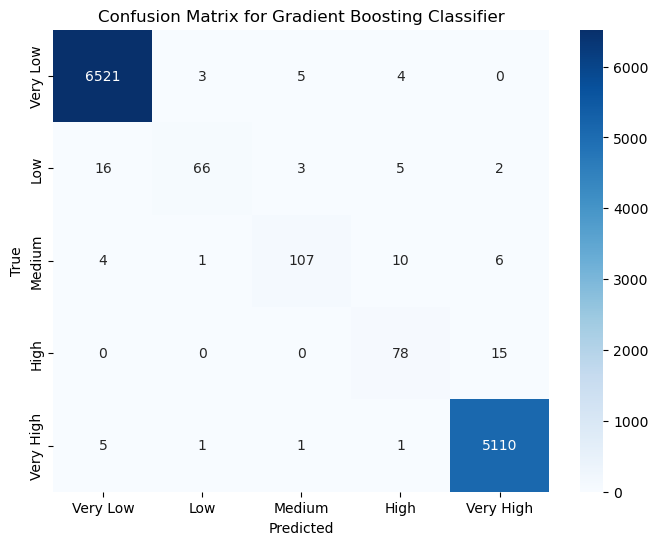

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and class labels for five classes
bins = [0, 3, 5, 7, 9, 10]  # Adjust bin edges based on the dataset's distribution
labels = [0, 1, 2, 3, 4]    # Assign numeric labels (e.g., 0 to 4)

# Binning the target variable into five classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Display the distribution of the binned target variable
print("Binned training target distribution:\n", y_train_binned.value_counts())
print("Binned testing target distribution:\n", y_test_binned.value_counts())

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Gradient Boosting Classifier with balanced class weights
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_imputed, y_train_binned)

# Predict on the test dataset
y_pred_gb = gb.predict(X_test_imputed)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Evaluate the model
accuracy = accuracy_score(y_test_binned, y_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(y_test_binned, y_pred_gb, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_gb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


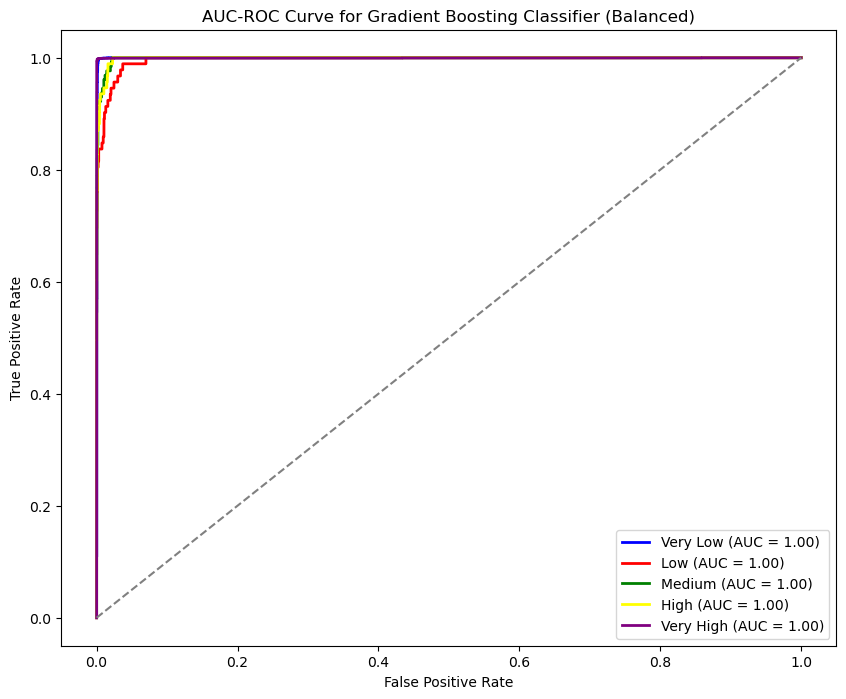

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC
lb = LabelBinarizer()
y_test_binned_bin = lb.fit_transform(y_test_binned)

# Predict probabilities for each class using Gradient Boosting
y_prob_gb = gb.predict_proba(X_test_imputed)  # Assuming 'gb' is the Gradient Boosting model

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple']  # Adjust colors for each class

for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_binned_bin[:, i], y_prob_gb[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('AUC-ROC Curve for Gradient Boosting Classifier (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


# XGBoost Classifier

Binned training target distribution:
 0    25538
4    20913
3      486
2      483
1      436
Name: Quality, dtype: int64
Binned testing target distribution:
 0    6533
4    5118
2     128
3      93
1      92
Name: Quality, dtype: int64


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9961


Classification Report:
               precision    recall  f1-score   support

    Very Low       1.00      1.00      1.00      6533
         Low       0.94      0.86      0.90        92
      Medium       0.93      0.87      0.90       128
        High       0.89      0.90      0.90        93
   Very High       1.00      1.00      1.00      5118

    accuracy                           1.00     11964
   macro avg       0.95      0.93      0.94     11964
weighted avg       1.00      1.00      1.00     11964



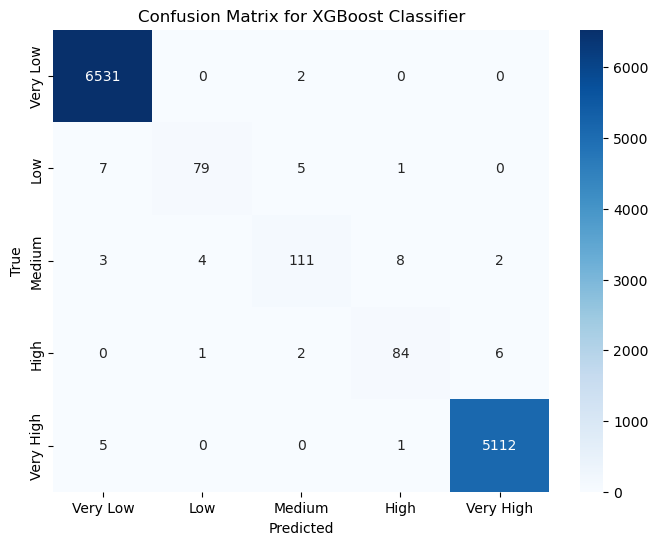

In [23]:
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and class labels for five classes
bins = [0, 3, 5, 7, 9, 10]  # Adjust bin edges based on the dataset's distribution
labels = [0, 1, 2, 3, 4]    # Assign numeric labels (e.g., 0 to 4)

# Binning the target variable into five classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Display the distribution of the binned target variable
print("Binned training target distribution:\n", y_train_binned.value_counts())
print("Binned testing target distribution:\n", y_test_binned.value_counts())

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train XGBoost Classifier with balanced class weights
xg_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=1,  # This parameter helps with class imbalance, adjust based on the dataset
    use_label_encoder=False,  # Avoid warning related to label encoding
    eval_metric='mlogloss'  # Set evaluation metric
)
xg_model.fit(X_train_imputed, y_train_binned)

# Predict on the test dataset
y_pred_xg = xg_model.predict(X_test_imputed)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Evaluate the model
accuracy = accuracy_score(y_test_binned, y_pred_xg)
print(f"\nXGBoost Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(y_test_binned, y_pred_xg, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_xg)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


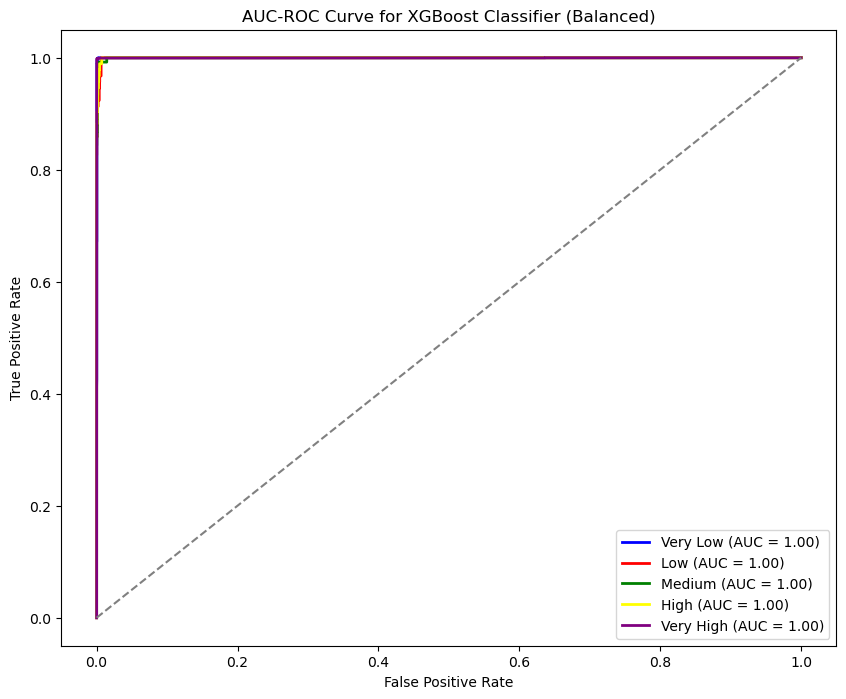

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC
lb = LabelBinarizer()
y_test_binned_bin = lb.fit_transform(y_test_binned)

# Predict probabilities for each class using XGBoost
y_prob_xg = xg_model.predict_proba(X_test_imputed)  # Assuming 'xg_model' is the trained XGBoost model

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple']  # Adjust colors for each class

for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_binned_bin[:, i], y_prob_xg[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('AUC-ROC Curve for XGBoost Classifier (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core

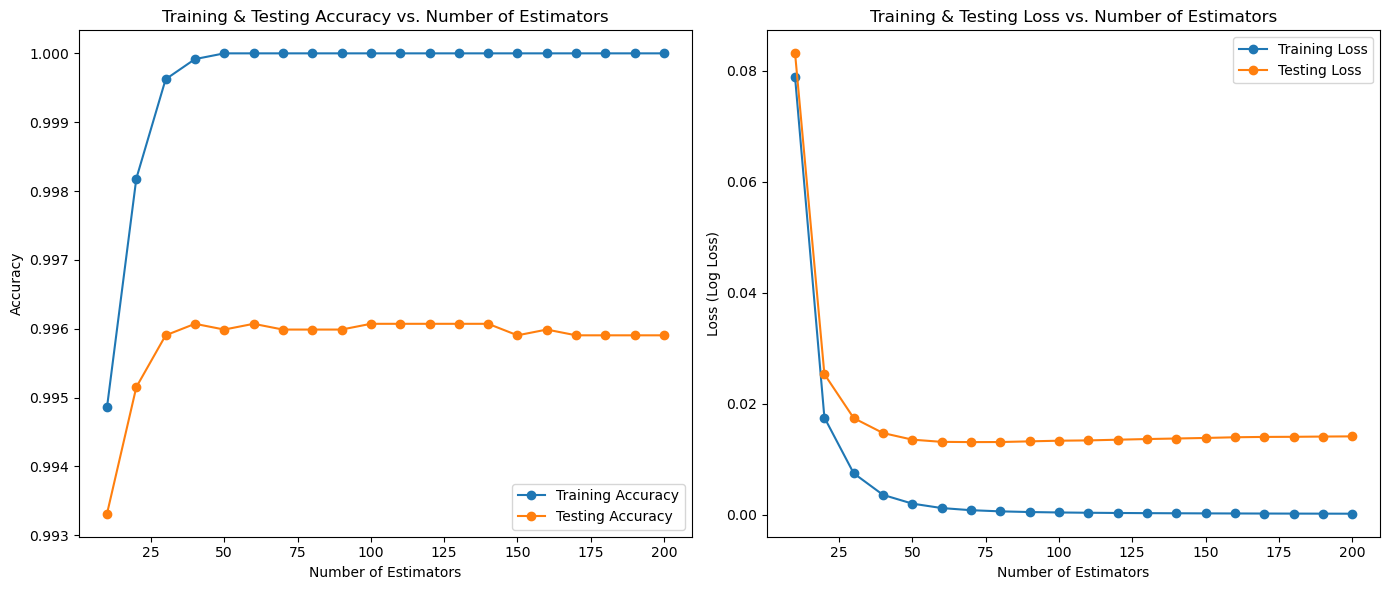

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store training and testing accuracy/loss
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []

# Train XGBoost Classifier for different numbers of estimators
n_estimators_values = range(10, 201, 10)  # Vary number of estimators from 10 to 200

for n_estimators in n_estimators_values:
    # Create and train the model
    xgb = XGBClassifier(n_estimators=n_estimators, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
    xgb.fit(X_train_imputed, y_train_binned)
    
    # Make predictions
    y_train_pred = xgb.predict(X_train_imputed)
    y_test_pred = xgb.predict(X_test_imputed)
    
    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train_binned, y_train_pred))
    test_accuracy.append(accuracy_score(y_test_binned, y_test_pred))
    
    # Calculate log loss (Training & Testing Loss)
    train_loss.append(log_loss(y_train_binned, xgb.predict_proba(X_train_imputed)))
    test_loss.append(log_loss(y_test_binned, xgb.predict_proba(X_test_imputed)))

# Plot Training & Testing Accuracy
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(n_estimators_values, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training & Testing Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(n_estimators_values, train_loss, label='Training Loss', marker='o')
plt.plot(n_estimators_values, test_loss, label='Testing Loss', marker='o')
plt.title('Training & Testing Loss vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss (Log Loss)')
plt.legend()

plt.tight_layout()
plt.show()


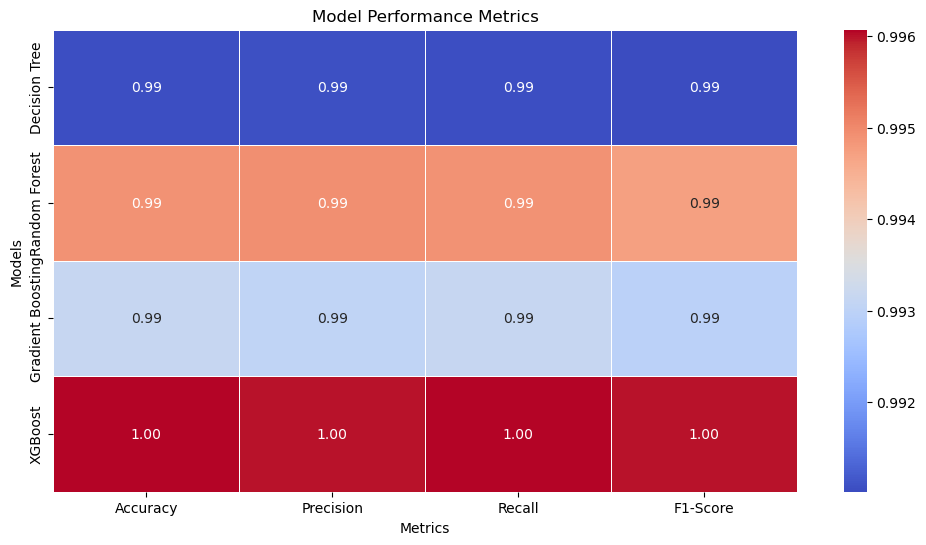

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Function to evaluate and store all metrics
def evaluate_model_metrics(model_name, y_true, y_pred):
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_true, y_pred))
    results["Precision"].append(precision_score(y_true, y_pred, average="weighted"))
    results["Recall"].append(recall_score(y_true, y_pred, average="weighted"))
    results["F1-Score"].append(f1_score(y_true, y_pred, average="weighted"))

# Evaluate Decision Tree Classifier
evaluate_model_metrics("Decision Tree", y_test_binned, y_pred_dtree)

# Evaluate Random Forest Classifier
evaluate_model_metrics("Random Forest", y_test_binned, y_pred_rf)

# Evaluate Gradient Boosting Classifier
evaluate_model_metrics("Gradient Boosting", y_test_binned, y_pred_gb)

# Evaluate XGBoost Classifier
evaluate_model_metrics("XGBoost", y_test_binned, y_pred_xg)

# Convert results to a DataFrame
results_df = pd.DataFrame(results).set_index("Model")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Model Performance Metrics")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.show()


DL MODEL

# CNN+LSTM

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Define bins and class labels for five classes
bins = [0, 3, 5, 7, 9, 10]  # Adjust bin edges based on the dataset's distribution
labels = [0, 1, 2, 3, 4]    # Assign numeric labels (e.g., 0 to 4)

# Binning the target variable into five classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Display the distribution of the binned target variable
print("Binned training target distribution:\n", y_train_binned.value_counts())
print("Binned testing target distribution:\n", y_test_binned.value_counts())

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Reshape data for CNN + LSTM model
X_train_cnn_lstm = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_cnn_lstm = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Convert target labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train_binned, num_classes=5)
y_test_categorical = to_categorical(y_test_binned, num_classes=5)

# Build CNN + LSTM model
input_layer = Input(shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2]))

# Convolutional Layers
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling1D(pool_size=2)(conv2)

# LSTM Layer
lstm = LSTM(64, return_sequences=False)(pool2)

# Fully Connected Layers
dense1 = Dense(64, activation='relu')(lstm)
dense1 = Dropout(0.4)(dense1)

output_layer = Dense(5, activation='softmax')(dense1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn_lstm, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test_categorical))

# Predict on the test dataset
y_pred = np.argmax(model.predict(X_test_cnn_lstm), axis=1)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_categorical, axis=1), y_pred)
print(f"\nCNN + LSTM Model Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(np.argmax(y_test_categorical, axis=1), y_pred, target_names=class_names))


Binned training target distribution:
 0    25538
4    20913
3      486
2      483
1      436
Name: Quality, dtype: int64
Binned testing target distribution:
 0    6533
4    5118
2     128
3      93
1      92
Name: Quality, dtype: int64
Epoch 1/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9190 - loss: 0.2897 - val_accuracy: 0.9686 - val_loss: 0.1364
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9475 - loss: 0.1803 - val_accuracy: 0.9712 - val_loss: 0.1073
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9597 - loss: 0.1362 - val_accuracy: 0.9679 - val_loss: 0.0993
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9575 - loss: 0.1396 - val_accuracy: 0.9613 - val_loss: 0.1330
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9605 - loss: 0.1282 - val_accuracy: 0.9671 - val_loss: 0.1133
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9620 - loss: 0.1263 - val_accuracy: 0.

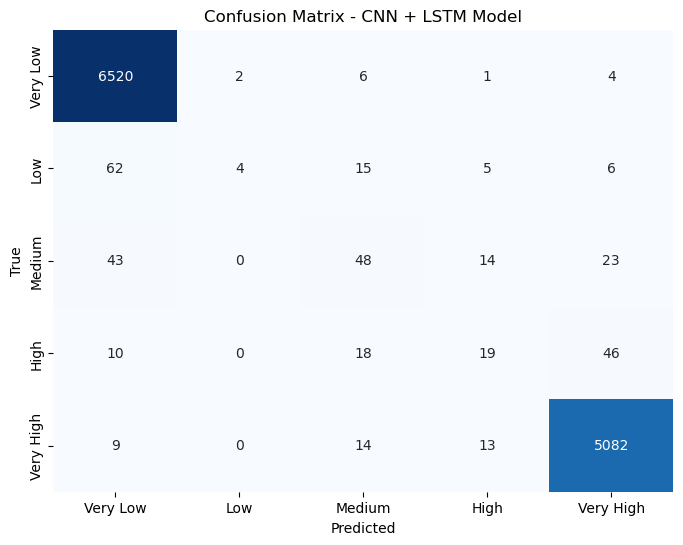

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test_categorical, axis=1), y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title("Confusion Matrix - CNN + LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


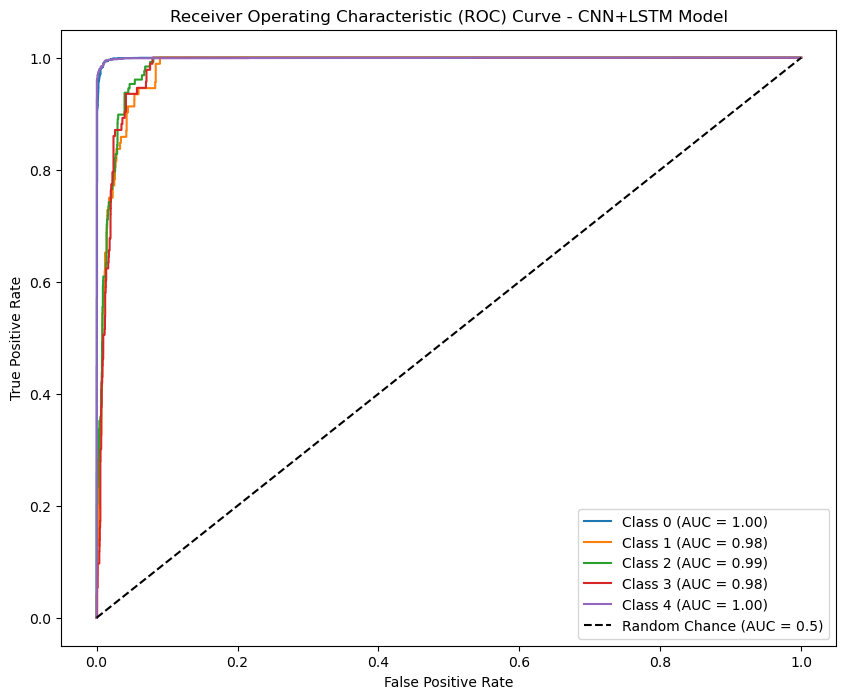

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Binarize the true labels for ROC AUC calculation
y_test_binarized = label_binarize(np.argmax(y_test_categorical, axis=1), classes=[0, 1, 2, 3, 4])

# Get predicted probabilities
y_pred_prob = model.predict(X_test_cnn_lstm)

# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):  # For each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.5)')
plt.title('Receiver Operating Characteristic (ROC) Curve - CNN+LSTM Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


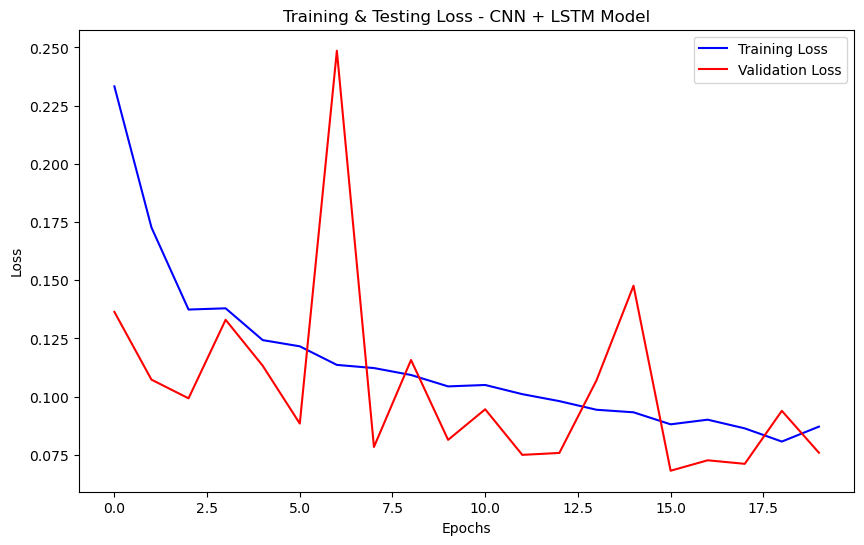

In [30]:
# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training & Testing Loss - CNN + LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


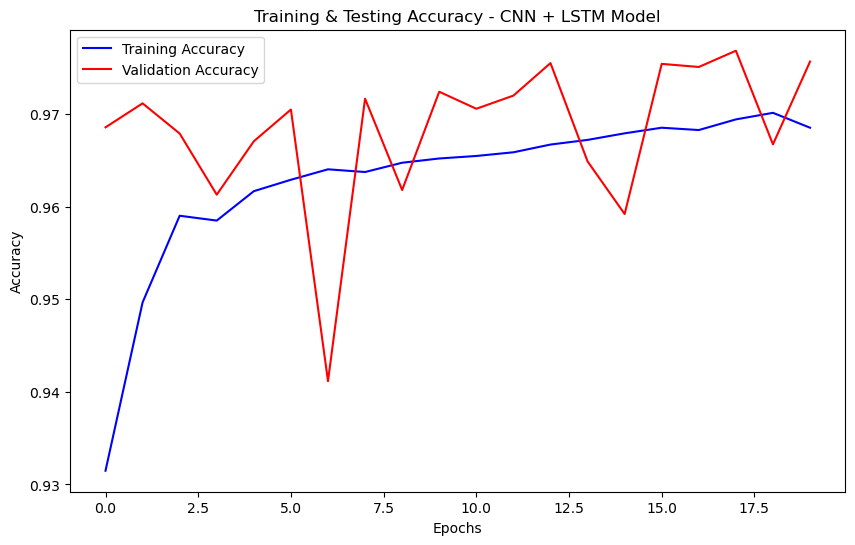

In [31]:
# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.title('Training & Testing Accuracy - CNN + LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# GRU

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Define bins and class labels for five classes
bins = [0, 3, 5, 7, 9, 10]  # Adjust bin edges based on the dataset's distribution
labels = [0, 1, 2, 3, 4]    # Assign numeric labels (e.g., 0 to 4)

# Binning the target variable into five classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Display the distribution of the binned target variable
print("Binned training target distribution:\n", y_train_binned.value_counts())
print("Binned testing target distribution:\n", y_test_binned.value_counts())

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Reshape the data for GRU input
X_train_gru = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_gru = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Convert target labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train_binned, num_classes=5)
y_test_categorical = to_categorical(y_test_binned, num_classes=5)

# Build GRU model
gru_model = Sequential([
    GRU(64, input_shape=(X_train_gru.shape[1], 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for 5 classes
])

gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the GRU model
gru_model.fit(X_train_gru, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test_categorical))

# Predict on the test dataset
y_pred_gru = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_categorical, axis=1), y_pred_gru)
print(f"\nGRU Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(np.argmax(y_test_categorical, axis=1), y_pred_gru, target_names=class_names))


Binned training target distribution:
 0    25538
4    20913
3      486
2      483
1      436
Name: Quality, dtype: int64
Binned testing target distribution:
 0    6533
4    5118
2     128
3      93
1      92
Name: Quality, dtype: int64
Epoch 1/20


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8888 - loss: 0.3224 - val_accuracy: 0.9634 - val_loss: 0.1251
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9565 - loss: 0.1431 - val_accuracy: 0.9590 - val_loss: 0.1266
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9623 - loss: 0.1149 - val_accuracy: 0.9737 - val_loss: 0.0692
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9690 - loss: 0.0840 - val_accuracy: 0.9637 - val_loss: 0.1086
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9734 - loss: 0.0687 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9739 - loss: 0.0654 - val_accuracy: 0.9809 - val_loss: 0.0483
Epoch 7/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9790 - loss: 0.0526 - val_accuracy: 0.9733 - val_loss: 0.0557
Epoch 8/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9770 - loss: 0.0582 

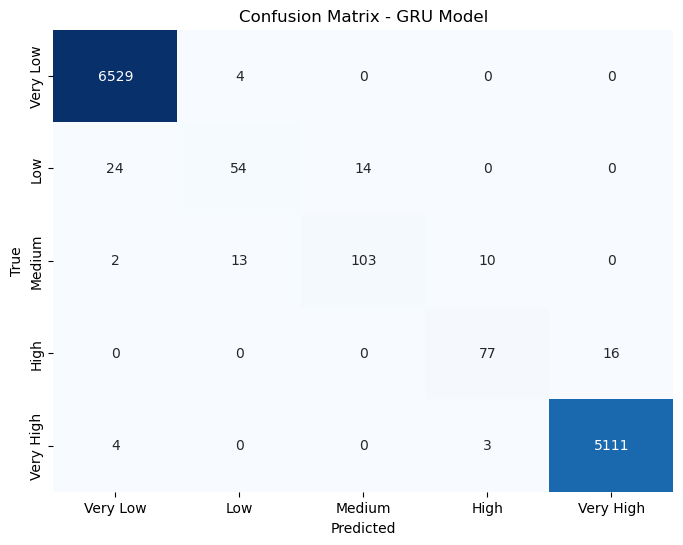

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for GRU model predictions
cm_gru = confusion_matrix(np.argmax(y_test_categorical, axis=1), y_pred_gru)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title("Confusion Matrix - GRU Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


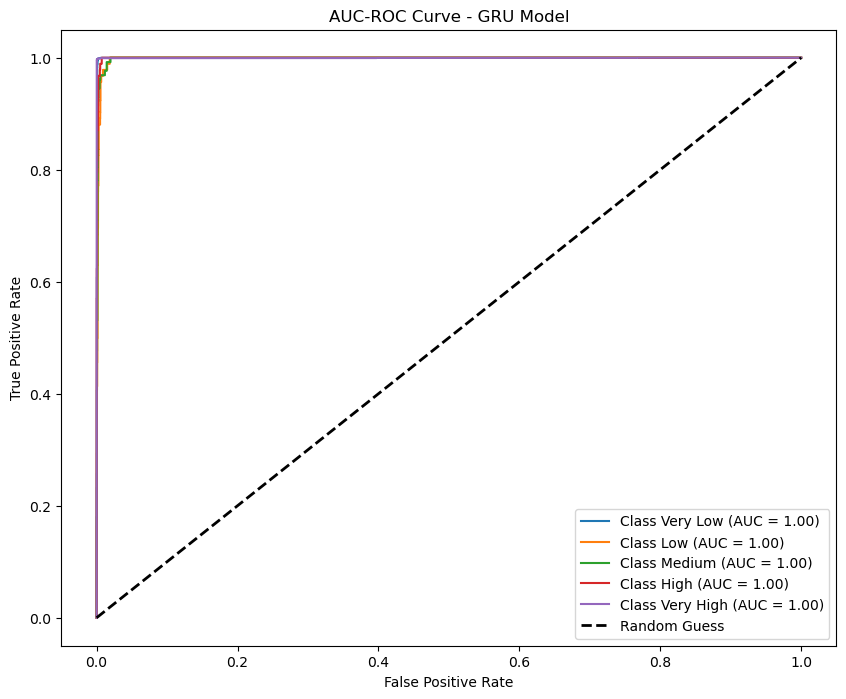

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the test labels for AUC-ROC computation
y_test_binarized = label_binarize(np.argmax(y_test_categorical, axis=1), classes=[0, 1, 2, 3, 4])

# Get predicted probabilities from the GRU model
y_pred_prob_gru = gru_model.predict(X_test_gru)

# Plot AUC-ROC for each class
plt.figure(figsize=(10, 8))
for i in range(5):  # Iterate over the five classes
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_gru[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.title('AUC-ROC Curve - GRU Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



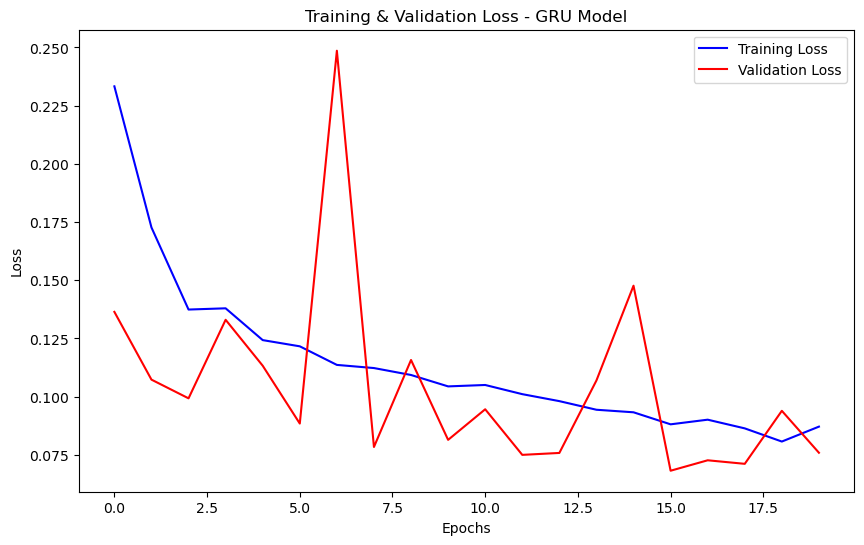

In [35]:
# Extract training and validation loss from the history object
train_loss_gru = history.history['loss']
val_loss_gru = history.history['val_loss']

# Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_gru, label='Training Loss', color='blue')
plt.plot(val_loss_gru, label='Validation Loss', color='red')
plt.title('Training & Validation Loss - GRU Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


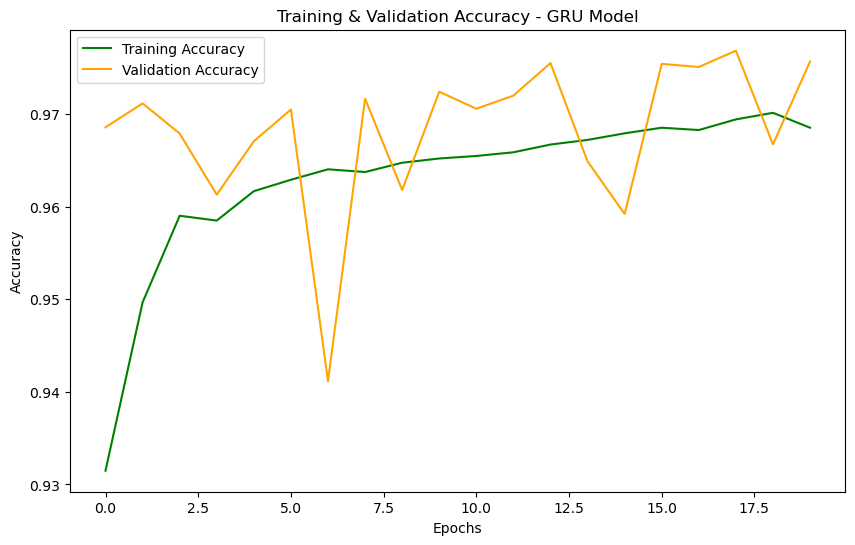

In [36]:
# Extract training and validation accuracy from the history object
train_accuracy_gru = history.history['accuracy']
val_accuracy_gru = history.history['val_accuracy']

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_gru, label='Training Accuracy', color='green')
plt.plot(val_accuracy_gru, label='Validation Accuracy', color='orange')
plt.title('Training & Validation Accuracy - GRU Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Long Short-Term Memory (LSTM)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Binning the target variable into five classes (same as before)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Convert target labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_binned, num_classes=5)
y_test_categorical = to_categorical(y_test_binned, num_classes=5)

# Reshape input for LSTM
X_train_lstm = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_lstm = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Build LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], 1), return_sequences=True),
    LSTM(32),
    Dense(5, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_model.fit(X_train_lstm, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_categorical))

# Evaluate the model
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
print(f"\nLSTM Accuracy: {accuracy_score(np.argmax(y_test_categorical, axis=1), y_pred_lstm):.4f}")
print("\nClassification Report:\n", classification_report(np.argmax(y_test_categorical, axis=1), y_pred_lstm, target_names=['Very Low', 'Low', 'Medium', 'High', 'Very High']))


Epoch 1/20


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9009 - loss: 0.3039 - val_accuracy: 0.9615 - val_loss: 0.1349
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9574 - loss: 0.1388 - val_accuracy: 0.9647 - val_loss: 0.1174
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9589 - loss: 0.1326 - val_accuracy: 0.9661 - val_loss: 0.1072
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9624 - loss: 0.1157 - val_accuracy: 0.9723 - val_loss: 0.0778
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9681 - loss: 0.0891 - val_accuracy: 0.9752 - val_loss: 0.0662
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9706 - loss: 0.0749 - val_accuracy: 0.9714 - val_loss: 0.0724
Epoch 7/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9725 - loss: 0.0701 - val_accuracy: 0.9713 - val_loss: 0.0702
Epoch 8/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9758 - loss: 0.062

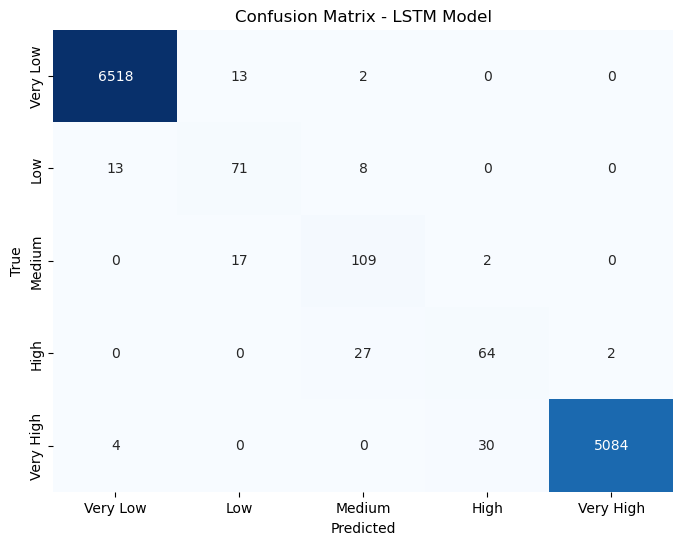

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for LSTM model predictions
cm_lstm = confusion_matrix(np.argmax(y_test_categorical, axis=1), y_pred_lstm)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title("Confusion Matrix - LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


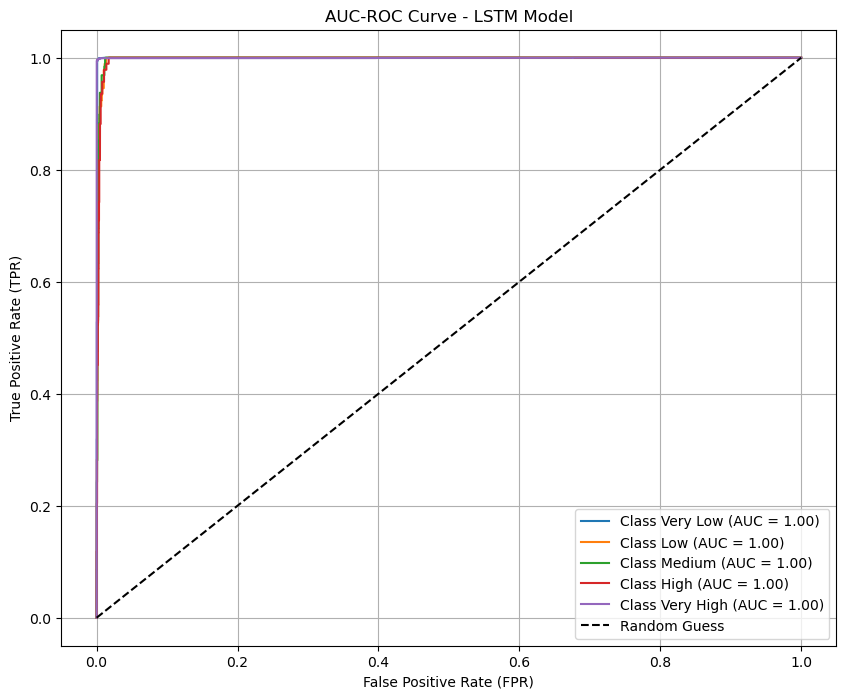

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 8))
for i in range(5):  # Assuming 5 classes
    fpr, tpr, _ = roc_curve(y_test_categorical[:, i], lstm_model.predict(X_test_lstm)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_names[i]} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("AUC-ROC Curve - LSTM Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


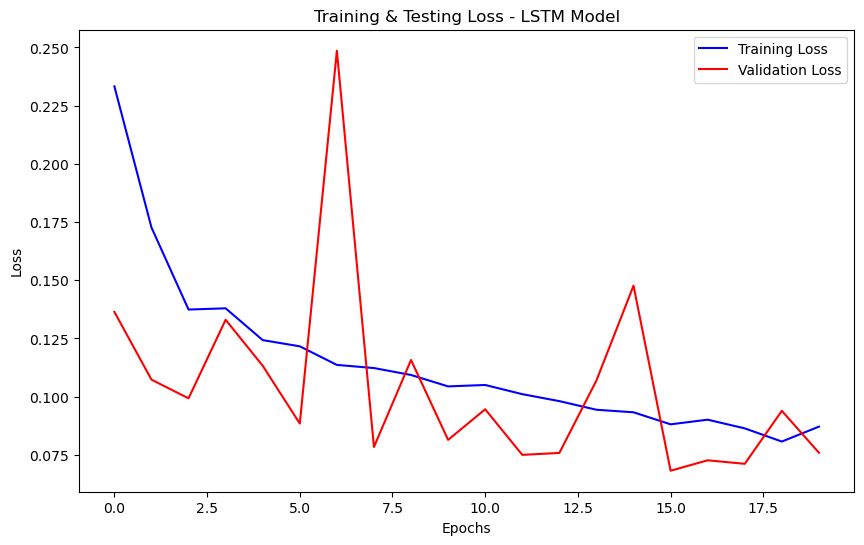

In [40]:
# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training & Testing Loss - LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


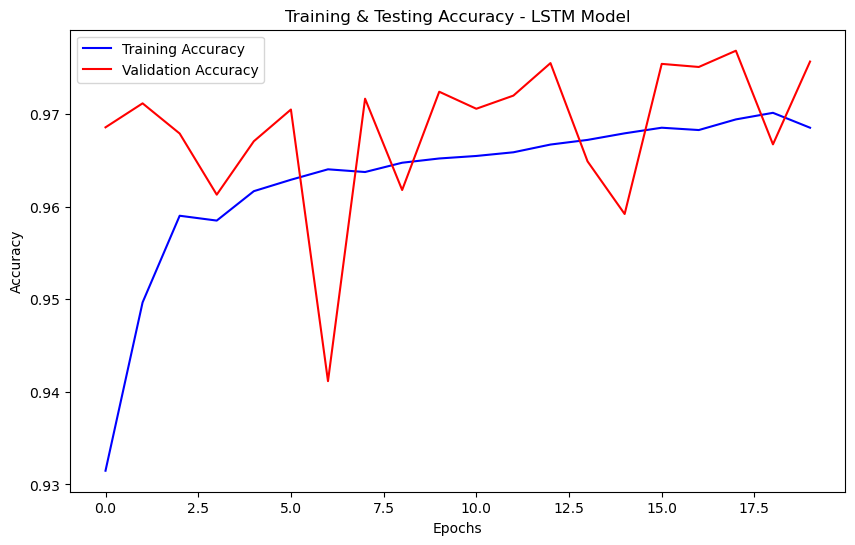

In [41]:
# Extract training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training & Testing Accuracy - LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Simple RNN (Recurrent Neural Network)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Binning the target variable into five classes (same as before)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Convert target labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_binned, num_classes=5)
y_test_categorical = to_categorical(y_test_binned, num_classes=5)

# Reshape input for RNN
X_train_rnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_rnn = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Build Simple RNN Model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_train_rnn.shape[1], 1)),
    Dense(5, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Simple RNN Model
rnn_model.fit(X_train_rnn, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_categorical))

# Evaluate the model
y_pred_rnn = np.argmax(rnn_model.predict(X_test_rnn), axis=1)
print(f"\nRNN Accuracy: {accuracy_score(np.argmax(y_test_categorical, axis=1), y_pred_rnn):.4f}")
print("\nClassification Report:\n", classification_report(np.argmax(y_test_categorical, axis=1), y_pred_rnn, target_names=['Very Low', 'Low', 'Medium', 'High', 'Very High']))


Epoch 1/20


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9338 - loss: 0.2281 - val_accuracy: 0.9622 - val_loss: 0.1343
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9638 - loss: 0.1135 - val_accuracy: 0.9698 - val_loss: 0.0881
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.0985 - val_accuracy: 0.9726 - val_loss: 0.0798
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9683 - loss: 0.0882 - val_accuracy: 0.9599 - val_loss: 0.1311
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9688 - loss: 0.0845 - val_accuracy: 0.9651 - val_loss: 0.1056
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9668 - loss: 0.0942 - val_accuracy: 0.9713 - val_loss: 0.0768
Epoch 7/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9707 - loss: 0.0798 - val_accuracy: 0.9752 - val_loss: 0.0658
Epoch 8/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9727 - loss: 0.0738 - val_accura

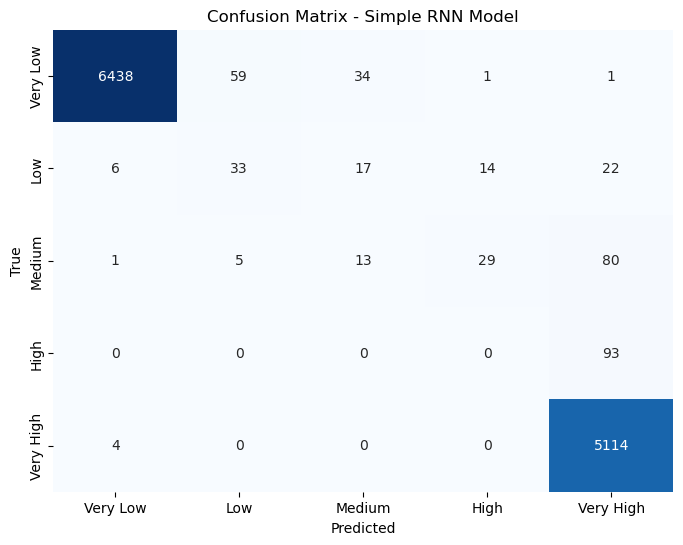

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Simple RNN model predictions
cm_rnn = confusion_matrix(np.argmax(y_test_categorical, axis=1), y_pred_rnn)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title("Confusion Matrix - Simple RNN Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


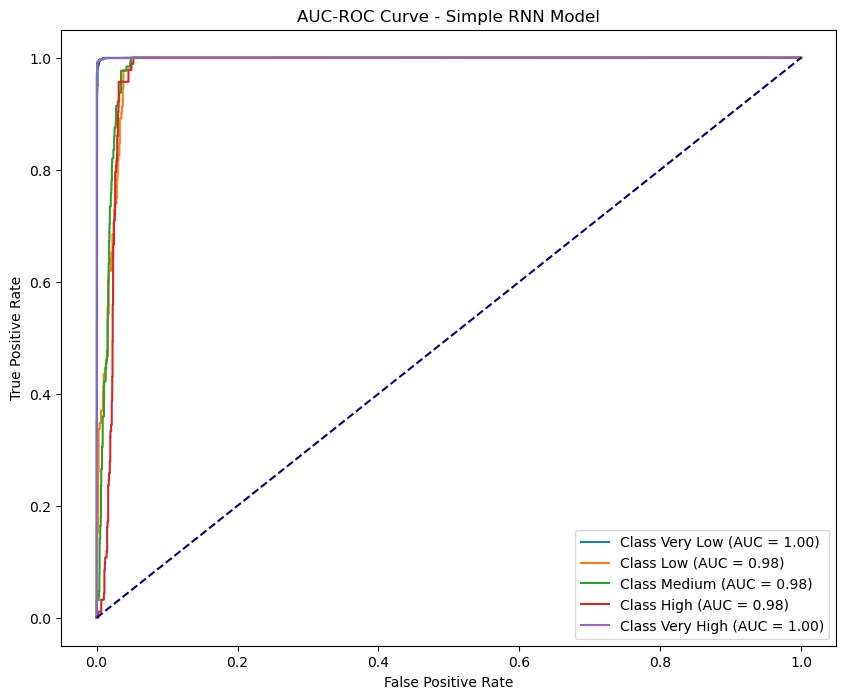

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class AUC-ROC
y_test_binarized = label_binarize(np.argmax(y_test_categorical, axis=1), classes=[0, 1, 2, 3, 4])

# Compute probabilities for each class
y_pred_rnn_probs = rnn_model.predict(X_test_rnn)

# Plot AUC-ROC for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_rnn_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("AUC-ROC Curve - Simple RNN Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


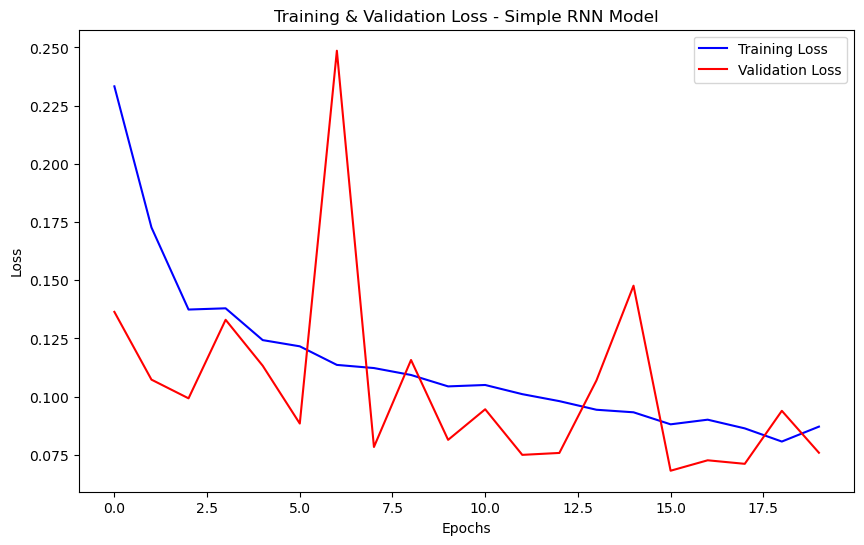

In [45]:
# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training & Validation Loss - Simple RNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


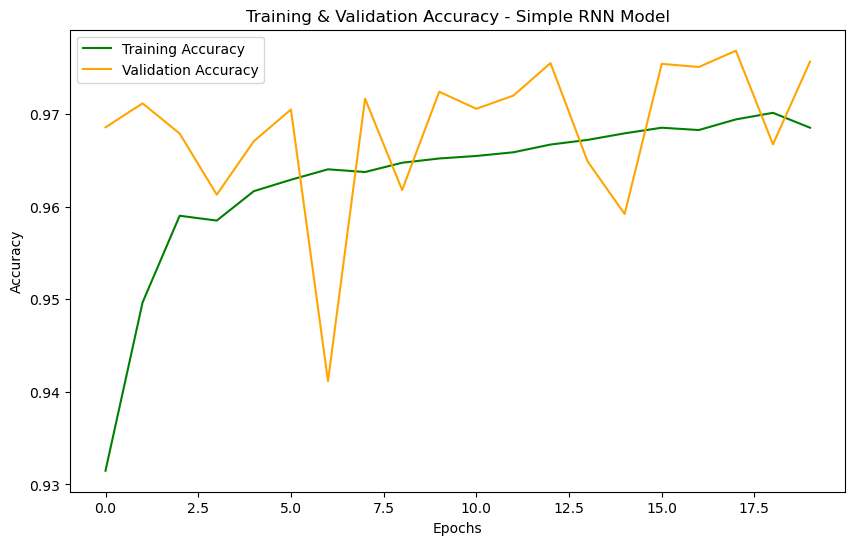

In [46]:
# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training & Validation Accuracy - Simple RNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [47]:
pip install gradio


Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install --upgrade huggingface_hub


     -------------------------------------- 464.1/464.1 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.27.0
    Uninstalling huggingface-hub-0.27.0:
      Successfully uninstalled huggingface-hub-0.27.0
Note: you may need to restart the kernel to use updated packages.


In [49]:

pip install huggingface_hub


Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained GRU model
model = load_model("trained_model_gru.h5")
print("Model loaded successfully!")

# Define class names for the target variable (Quality score range 1-10)
class_scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Take input from the user for the five most important features
print("\nEnter the values for the following features (separated by spaces):")
feature_names = ["alcohol", "volatile_acidity", "density", "pH", "sulphates"]

# Prompt the user for input
user_input = input(f"Enter values for {', '.join(feature_names)}: ")

# Convert input to a numpy array
try:
    user_features = np.array([float(x) for x in user_input.split()]).reshape(1, -1)
except ValueError:
    print("Invalid input. Please ensure all values are numeric.")
    exit()

# Reshape and preprocess the input for the GRU model
user_features = user_features.reshape(user_features.shape[0], user_features.shape[1], 1)

# Predict the quality score (probabilities)
predicted_probs = model.predict(user_features)

# Get the predicted class index with the highest probability
predicted_class = np.argmax(predicted_probs, axis=1)

# Map the predicted class index to the corresponding quality score (1-10)
predicted_quality = class_scores[predicted_class[0]]

# Output the prediction
print(f"\nPredicted Quality Score: {predicted_quality}")


Model loaded successfully!

Enter the values for the following features (separated by spaces):
Enter values for alcohol, volatile_acidity, density, pH, sulphates: 10.5 0.5 0.9978 3.35 0.8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

Predicted Quality Score: 5


In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load dataset (for example purposes, using Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train an XGBoost model
params = {
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(set(y)),  # Number of classes
    'eval_metric': 'merror',  # Evaluation metric
}

model = xgb.train(params, dtrain, num_boost_round=100)

# Save the trained model
model.save_model("trained_model_xgboost.model")
print("Model saved successfully!")


Model saved successfully!


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [52]:
import joblib
from sklearn.tree import DecisionTreeClassifier

# Example: Train your Decision Tree model (replace with your actual training code)
X_train = [[7.4, 0.7, 0.2, 3.51, 0.56], [7.8, 0.88, 0.26, 3.51, 0.65]]  # Example data
y_train = [5, 6]  # Example target labels

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'trained_model_decision_tree.pkl')
print("Model saved successfully as 'trained_model_decision_tree.pkl'.")


Model saved successfully as 'trained_model_decision_tree.pkl'.


In [53]:
import joblib
from sklearn.ensemble import GradientBoostingClassifier

# Example: Train your Gradient Boosting model (replace with your actual training code)
X_train = [[7.4, 0.7, 0.2, 3.51, 0.56], [7.8, 0.88, 0.26, 3.51, 0.65]]  # Example data
y_train = [5, 6]  # Example target labels

# Initialize the Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the example data
model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(model, 'trained_model_gradient_boosting.pkl')
print("Model saved successfully as 'trained_model_gradient_boosting.pkl'.")


Model saved successfully as 'trained_model_gradient_boosting.pkl'.


# DEcision tree output test

In [54]:
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# Load your actual dataset
df = pd.read_csv('finalwine.csv')

# Split the data into features (X) and target (y)
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]  # Selecting the relevant features
y = df['Quality']  # Target column

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Train the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_imputed, y_binned)

# Save the trained model and imputer
joblib.dump(dtree, 'decision_tree_model.pkl')
joblib.dump(imputer, 'imputer.pkl')

print("Model and imputer saved successfully!")


Model and imputer saved successfully!


In [55]:
# Load the saved model and imputer
dtree = joblib.load('decision_tree_model.pkl')
imputer = joblib.load('imputer.pkl')

print("Model and imputer loaded successfully!")


Model and imputer loaded successfully!


In [56]:
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Define the wine names for each quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Make a prediction using the loaded model
prediction = dtree.predict(user_input_imputed)

# Map the prediction to the corresponding quality score and class name
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
predicted_class = class_names[prediction[0]]

# Map the predicted class (0-4) to a quality score (1-10) based on the decision tree's predictions
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Get the quality score
quality_score = class_to_quality_score[prediction[0]]

# Get the corresponding wine names
predicted_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

# Output the predicted quality score, class, and wines
print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {predicted_class}")
print("Recommended Wines:")
for wine in predicted_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 10.5 0.5 0.9978 3.35 0.8

Predicted Quality Score: 8
Quality Class: High
Recommended Wines:
- York Arros
- Grover Zampa Vijay Amritraj Reserve Collection
- Sula Brut Tropicale
- Fratelli Vitae Tre Chardonnay
- Big Banyan Merlot


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# random forest classifier output test 

In [57]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# Load your actual dataset
df = pd.read_csv('finalwine.csv')

# Split the data into features (X) and target (y)
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]  # Selecting the relevant features
y = df['Quality']  # Target column

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_imputed, y_binned)

# Save the trained model and imputer
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(imputer, 'imputer.pkl')

print("Random Forest model and imputer saved successfully!")


Random Forest model and imputer saved successfully!


In [58]:
import joblib

# Load the saved Random Forest model and imputer
rf = joblib.load('random_forest_model.pkl')
imputer = joblib.load('imputer.pkl')

print("Random Forest model and imputer loaded successfully!")


Random Forest model and imputer loaded successfully!


In [59]:
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Define the wine names for each quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Make a prediction using the loaded model
prediction = dtree.predict(user_input_imputed)

# Map the prediction to the corresponding quality score and class name
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
predicted_class = class_names[prediction[0]]

# Map the predicted class (0-4) to a quality score (1-10) based on the decision tree's predictions
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Get the quality score
quality_score = class_to_quality_score[prediction[0]]

# Get the corresponding wine names
predicted_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

# Output the predicted quality score, class, and wines
print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {predicted_class}")
print("Recommended Wines:")
for wine in predicted_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 9.8 0.655 0.9966 3.17 0.66

Predicted Quality Score: 3
Quality Class: Very Low
Recommended Wines:
- Goa King's Original Port
- Indus Red Table Wine
- Heritage Red Grape Wine
- Good Drop Rio Fizzy White
- Casablanca Sweet Red


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# gradient boosting classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib

# Load your actual dataset (adjust file path if needed)
df = pd.read_csv('finalwine.csv')

# Split the data into features (X) and target (y)
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]  # Selecting the relevant features
y = df['Quality']  # Target column

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_imputed, y_train)

# Save the trained model and imputer
joblib.dump(gb, 'gradient_boosting_model.pkl')
joblib.dump(imputer, 'imputer.pkl')

print("Model and imputer saved successfully!")


Model and imputer saved successfully!


In [61]:
import joblib
import pandas as pd
import numpy as np

# Load the saved model and imputer
gb = joblib.load('gradient_boosting_model.pkl')
imputer = joblib.load('imputer.pkl')

# Define wine names for each quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get user input
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Make a prediction using the loaded model
prediction = gb.predict(user_input_imputed)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Map the predicted class (0-4) to a quality score (1-10) based on the Gradient Boosting model's predictions
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Output the predicted quality score, class, and wines
quality_score = class_to_quality_score[prediction[0]]
predicted_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {class_names[prediction[0]]}")
print("Recommended Wines:")
for wine in predicted_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 10.2 0.64 0.9956 3.34 0.52

Predicted Quality Score: 10
Quality Class: Very High
Recommended Wines:
- Sula Rasa Shiraz
- Grover Zampa Chêne Grand Reserve
- Fratelli Sette Reserve Red
- KRSMA Cabernet Sauvignon
- Charosa Reserve Tempranillo


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# XG BOOST CLASSIFIER


In [62]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib

# Load your actual dataset (adjust file path if needed)
df = pd.read_csv('finalwine.csv')

# Split the data into features (X) and target (y)
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]  # Selecting the relevant features
y = df['Quality']  # Target column

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_imputed, y_train)

# Save the trained model and imputer
joblib.dump(xgb, 'xgboost_model.pkl')
joblib.dump(imputer, 'imputer.pkl')

print("XGBoost model and imputer saved successfully!")


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model and imputer saved successfully!


In [63]:
import joblib
import pandas as np

# Load the saved XGBoost model and imputer
xgb = joblib.load('xgboost_model.pkl')
imputer = joblib.load('imputer.pkl')

# Define wine names for each quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get user input
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Make a prediction using the loaded model
prediction = xgb.predict(user_input_imputed)

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Map the predicted class (0-4) to a quality score (1-10) based on the XGBoost model's predictions
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Output the predicted quality score, class, and wines
quality_score = class_to_quality_score[prediction[0]]
predicted_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {class_names[prediction[0]]}")
print("Recommended Wines:")
for wine in predicted_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 10.2 0.755 0.9969 2.87 1.36

Predicted Quality Score: 4
Quality Class: Low
Recommended Wines:
- Good Drop Rio Fizzy Red
- Vino Royale Port Wine
- Big Banyan Zinfandel
- Goa Port Wine Classic
- Heritage Port Wine


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# CNN+LSTM

In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import joblib

# Load dataset (adjust the file path as needed)
df = pd.read_csv('finalwine.csv')

# Split the data into features (X) and target (y)
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]  # Selecting the relevant features
y = df['Quality']  # Target column

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Reshape the data for CNN+LSTM model input (samples, timesteps, features)
X_train_cnn_lstm = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_cnn_lstm = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Convert target labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=5)
y_test_categorical = to_categorical(y_test, num_classes=5)

# Build CNN+LSTM Model
input_layer = Input(shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2]))

# Convolutional Layers
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling1D(pool_size=2)(conv2)

# LSTM Layer
lstm = LSTM(64, return_sequences=False)(pool2)

# Fully Connected Layers
dense1 = Dense(64, activation='relu')(lstm)
dense1 = Dropout(0.4)(dense1)

output_layer = Dense(5, activation='softmax')(dense1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn_lstm, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test_categorical))

# Save the trained model
model.save('cnn_lstm_model.h5')

# Save the imputer
joblib.dump(imputer, 'imputer.pkl')

print("CNN+LSTM model and imputer saved successfully!")


Epoch 1/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6354 - loss: 0.7929 - val_accuracy: 0.6577 - val_loss: 0.7160
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6844 - loss: 0.7104 - val_accuracy: 0.5429 - val_loss: 0.7944
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6909 - loss: 0.7019 - val_accuracy: 0.6988 - val_loss: 0.6770
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6914 - loss: 0.7015 - val_accuracy: 0.6905 - val_loss: 0.6894
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7044 - loss: 0.6824 - val_accuracy: 0.7116 - val_loss: 0.6598
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7066 - loss: 0.6776 - val_accuracy: 0.6981 - val_loss: 0.6759
Epoch 7/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7050 - loss: 0.6837 - val_accuracy: 0.7085 - val_loss: 0.6609
Epoch 8/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7047 - loss: 0.679

CNN+LSTM model and imputer saved successfully!


In [65]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved CNN+LSTM model and imputer
cnn_lstm_model = load_model('cnn_lstm_model.h5')
imputer = joblib.load('imputer.pkl')

# Define wine names for each quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get user input
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Reshape the input for CNN+LSTM model (samples, timesteps, features)
user_input_cnn_lstm = np.array(user_input_imputed).reshape(1, 5, 1)

# Make a prediction using the loaded CNN+LSTM model
prediction = cnn_lstm_model.predict(user_input_cnn_lstm)

# Print the raw model output (probabilities for each class)
print(f"Model Output (Probabilities for Each Class): {prediction}")

# Define class names for the target variable
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Map the predicted class (0-4) to a quality score (1-10) based on the CNN+LSTM model's predictions
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Get the predicted class and map it to quality score
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability
quality_score = class_to_quality_score[predicted_class]

# Get recommended wines for the quality score
recommended_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

# Output the predicted quality score, class, and wines
print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {class_names[predicted_class]}")
print("Recommended Wines:")
for wine in recommended_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 12.9 0.6 0.9932 3.85 0.6


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Model Output (Probabilities for Each Class): [[0.2253493  0.00091806 0.00122197 0.0275713  0.7449394 ]]

Predicted Quality Score: 10
Quality Class: Very High
Recommended Wines:
- Sula Rasa Shiraz
- Grover Zampa Chêne Grand Reserve
- Fratelli Sette Reserve Red
- KRSMA Cabernet Sauvignon
- Charosa Reserve Tempranillo


# GRU

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import joblib

# Load your dataset (adjust file path as needed)
df = pd.read_csv('finalwine.csv')

# Select the relevant features
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]
y = df['Quality']

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Convert the binned target variable to integer type
y_binned = y_binned.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Reshape the data for GRU (samples, timesteps, features)
X_train_gru = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_gru = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Build the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
gru_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
gru_model.fit(X_train_gru, y_train, epochs=10, batch_size=32, validation_data=(X_test_gru, y_test))

# Save the trained model and imputer
gru_model.save('gru_model.h5')
joblib.dump(imputer, 'imputer.pkl')

print("GRU model and imputer saved successfully!")


Epoch 1/10


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5346 - loss: 0.8824 - val_accuracy: 0.6143 - val_loss: 0.7794
Epoch 2/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6433 - loss: 0.7603 - val_accuracy: 0.6588 - val_loss: 0.7248
Epoch 3/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6656 - loss: 0.7389 - val_accuracy: 0.6941 - val_loss: 0.6923
Epoch 4/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6815 - loss: 0.7165 - val_accuracy: 0.7024 - val_loss: 0.6700
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6886 - loss: 0.7033 - val_accuracy: 0.7085 - val_loss: 0.6669
Epoch 6/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6887 - loss: 0.7054 - val_accuracy: 0.7025 - val_loss: 0.6651
Epoch 7/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6917 - loss: 0.6959 - val_accuracy: 0.7131 - val_loss: 0.6662
Epoch 8/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6987 - loss: 0.6901 - val

GRU model and imputer saved successfully!


In [67]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Load the saved GRU model and imputer
gru_model = load_model('gru_model.h5')
imputer = joblib.load('imputer.pkl')

# Define class names and quality-to-wine mappings
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get user input
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Reshape the input for the GRU model (samples, timesteps, features)
user_input_gru = np.array(user_input_imputed).reshape(1, len(user_input_imputed[0]), 1)

# Make a prediction using the GRU model
prediction = gru_model.predict(user_input_gru)

# Convert predictions from one-hot encoding to class labels
predicted_class = np.argmax(prediction, axis=1)[0]

# Map the predicted class to a quality score
quality_score = class_to_quality_score[predicted_class]

# Get recommended wines for the quality score
recommended_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

# Output the predicted quality score, class, and wines
print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {class_names[predicted_class]}")
print("Recommended Wines:")
for wine in recommended_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 10.2 0.755 0.9969 2.87 1.36 


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

Predicted Quality Score: 3
Quality Class: Very Low
Recommended Wines:
- Goa King's Original Port
- Indus Red Table Wine
- Heritage Red Grape Wine
- Good Drop Rio Fizzy White
- Casablanca Sweet Red


# DNN

In [68]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('finalwine.csv')

# Prepare the feature and target data
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
y = df['Quality']

# Ensure that Quality is treated as numeric (convert to integer)
y_binned = pd.cut(y, bins=[0, 3, 5, 7, 9, 10], labels=[0, 1, 2, 3, 4], include_lowest=True).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Build a simple DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_imputed.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_imputed, y_train, epochs=10, batch_size=32, validation_data=(X_test_imputed, y_test))

# Save the trained model and imputer
model.save('dnn_model.h5')
import joblib
joblib.dump(imputer, 'imputer.pkl')

print("DNN model and imputer saved successfully!")


Epoch 1/10


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5127 - loss: 0.9248 - val_accuracy: 0.6470 - val_loss: 0.7718
Epoch 2/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6565 - loss: 0.7606 - val_accuracy: 0.6771 - val_loss: 0.7234
Epoch 3/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6681 - loss: 0.7398 - val_accuracy: 0.6687 - val_loss: 0.7190
Epoch 4/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6746 - loss: 0.7291 - val_accuracy: 0.6885 - val_loss: 0.7075
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6774 - loss: 0.7176 - val_accuracy: 0.6880 - val_loss: 0.6964
Epoch 6/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6860 - loss: 0.7105 - val_accuracy: 0.6998 - val_loss: 0.6801
Epoch 7/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6890 - loss: 0.6966 - val_accuracy: 0.7015 - val_loss: 0.6740
Epoch 8/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6953 - loss: 0.6958 - val_accurac

DNN model and imputer saved successfully!


In [69]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved DNN model and imputer
dnn_model = load_model('dnn_model.h5')
imputer = joblib.load('imputer.pkl')

# Define class names and quality-to-wine mappings
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get user input
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Make predictions using the DNN model
prediction = dnn_model.predict(user_input_imputed)

# Convert predictions from one-hot encoding to class labels
predicted_class = np.argmax(prediction, axis=1)[0]

# Map the predicted class to a quality score
quality_score = class_to_quality_score[predicted_class]

# Get recommended wines for the quality score
recommended_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

# Output the predicted quality score, class, and wines
print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {class_names[predicted_class]}")
print("Recommended Wines:")
for wine in recommended_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 9.8 0.655 0.9966 3.17 0.66


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Predicted Quality Score: 10
Quality Class: Very High
Recommended Wines:
- Sula Rasa Shiraz
- Grover Zampa Chêne Grand Reserve
- Fratelli Sette Reserve Red
- KRSMA Cabernet Sauvignon
- Charosa Reserve Tempranillo


# Simple RNN

In [70]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset (adjust file path if needed)
df = pd.read_csv('finalwine.csv')

# Check if the 'Quality' column is of category dtype and convert it to integers if necessary
if df['Quality'].dtype.name == 'category':
    df['Quality'] = df['Quality'].cat.codes  # Convert category to numeric codes

# Split the data into features (X) and target (y)
X = df[['alcohol', 'volatile_acidity', 'density', 'pH', 'sulphates']]  # Selecting the relevant features
y = df['Quality']  # Target column

# Binning the target variable into five classes for classification (Quality: 1-10, mapped to 0-4)
bins = [0, 3, 5, 7, 9, 10]
labels = [0, 1, 2, 3, 4]
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Ensure the target is now of integer type after binning
y_binned = y_binned.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Reshape the data for the RNN model (samples, timesteps, features)
X_train_rnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_test_rnn = X_test_imputed.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)

# Build the Simple RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], 1)))  # 50 RNN units
model.add(Dense(5, activation='softmax'))  # 5 classes, using softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Save the trained model and imputer
model.save('simple_rnn_model.h5')
joblib.dump(imputer, 'imputer.pkl')

print("Simple RNN model and imputer saved successfully!")


Epoch 1/10


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5547 - loss: 0.8359 - val_accuracy: 0.6240 - val_loss: 0.7567
Epoch 2/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6425 - loss: 0.7661 - val_accuracy: 0.6652 - val_loss: 0.7249
Epoch 3/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6513 - loss: 0.7497 - val_accuracy: 0.6707 - val_loss: 0.7151
Epoch 4/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6662 - loss: 0.7288 - val_accuracy: 0.6754 - val_loss: 0.7172
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6756 - loss: 0.7140 - val_accuracy: 0.6871 - val_loss: 0.6957
Epoch 6/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6790 - loss: 0.7112 - val_accuracy: 0.6836 - val_loss: 0.6875
Epoch 7/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6917 - loss: 0.6950 - val_accuracy: 0.6887 - val_loss: 0.6918
Epoch 8/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.6951 - val_accurac

Simple RNN model and imputer saved successfully!


In [71]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Load the saved Simple RNN model and imputer
rnn_model = load_model('simple_rnn_model.h5')
imputer = joblib.load('imputer.pkl')

# Define class names
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Wine recommendations based on quality scores
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get user input
def get_user_input():
    # Prompt user to enter values for all features in one line separated by spaces
    user_input = input("Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): ")

    # Split the input string by spaces and convert each value to float
    try:
        features = list(map(float, user_input.split()))
        if len(features) != 5:
            raise ValueError("Please enter exactly 5 values.")
        return [features]
    except ValueError as e:
        print(f"Invalid input: {e}")
        return get_user_input()  # Retry if invalid input

# Get the user input
user_input = get_user_input()

# Impute any missing values in the user input (if any)
user_input_imputed = imputer.transform(user_input)

# Reshape the input for the RNN model (samples, timesteps, features)
user_input_rnn = np.array(user_input_imputed).reshape(1, len(user_input_imputed[0]), 1)

# Make a prediction using the Simple RNN model
prediction = rnn_model.predict(user_input_rnn)

# Convert predictions from one-hot encoding to class labels
predicted_class = np.argmax(prediction, axis=1)[0]

# Map the predicted class to a quality score
quality_score = class_to_quality_score[predicted_class]

# Output the predicted quality score and class
print(f"\nPredicted Quality Score: {quality_score}")
print(f"Quality Class: {class_names[predicted_class]}")

# Recommend wines based on the predicted quality score
recommended_wines = wine_names.get(quality_score, ["No wines available for this quality score."])

# Output wine recommendations
print("\nRecommended Wines:")
for wine in recommended_wines:
    print(f"- {wine}")


Enter values for alcohol, volatile_acidity, density, pH, sulphates (separated by spaces): 12.9 0.6 0.9932 3.85 0.6


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

Predicted Quality Score: 10
Quality Class: Very High

Recommended Wines:
- Sula Rasa Shiraz
- Grover Zampa Chêne Grand Reserve
- Fratelli Sette Reserve Red
- KRSMA Cabernet Sauvignon
- Charosa Reserve Tempranillo


In [72]:
import gradio as gr
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load all models and imputer
dtree = joblib.load('decision_tree_model.pkl')
rf = joblib.load('random_forest_model.pkl')
gb = joblib.load('gradient_boosting_model.pkl')
rnn_model = load_model('simple_rnn_model.h5')
dnn_model = load_model('dnn_model.h5')
xgboost_model = joblib.load('xgboost_model.pkl')  # Load XGBoost model
cnn_lstm_model = load_model('cnn_lstm_model.h5')  # Load CNN + LSTM model
gru_model = load_model('gru_model.h5')  # Load GRU model

# You can load the other models (e.g., XGBoost, CNN, etc.) similarly

imputer = joblib.load('imputer.pkl')

# Define class names
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Wine recommendations mapped by quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get prediction from the selected model and output the quality score and wine recommendations
def predict_quality(model_choice, alcohol, volatile_acidity, density, pH, sulphates):
    try:
        # Convert inputs to a list of floats
        user_input = [float(alcohol), float(volatile_acidity), float(density), float(pH), float(sulphates)]
    except ValueError:
        return {"Error": "Please ensure all inputs are valid numbers."}
    
    # Impute missing values
    user_input_imputed = imputer.transform([user_input])

    # Predict based on the selected model
    if model_choice == 'Decision Tree':
        prediction = dtree.predict(user_input_imputed)[0]
    elif model_choice == 'Random Forest':
        prediction = rf.predict(user_input_imputed)[0]
    elif model_choice == 'Gradient Boosting':
        prediction = gb.predict(user_input_imputed)[0]
    elif model_choice == 'Simple RNN':
        prediction = np.argmax(rnn_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'DNN':
        prediction = np.argmax(dnn_model.predict(user_input_imputed), axis=1)[0]
    elif model_choice == 'XGBoost':
        prediction = xgboost_model.predict(user_input_imputed)[0]
    elif model_choice == 'CNN+LSTM':
        prediction = np.argmax(cnn_lstm_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'GRU':
        prediction = np.argmax(gru_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    # Add other models here as necessary

    # Get the quality score and class name
    quality_score = class_to_quality_score[prediction]
    quality_class = class_names[prediction]

    # Get wine recommendations based on quality class
    recommended_wines = wine_names[quality_score]

    # Generate output message with HTML formatting
    output_html = f"""
    <div style="border: 2px solid #ddd; padding: 20px; border-radius: 8px; background-color: #f9f9f9;">
        <h3 style="color: #4CAF50;">Wine Quality Prediction</h3>
        <p><strong>Quality Score:</strong> {quality_score}</p>
        <p><strong>Quality Class:</strong> {quality_class}</p>
        <p><strong>Recommended Wines:</strong></p>
        <ul>
        {"".join([f"<li>{wine}</li>" for wine in recommended_wines])}
        </ul>
    </div>
    """
    
    return output_html

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_quality,
    inputs=[
        gr.Dropdown(
            choices=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Simple RNN', 'DNN', 'XGBoost', 'CNN+LSTM', 'GRU'], 
            label="Select Model"
        ),
        gr.Textbox(label="Alcohol", placeholder="Enter alcohol value"),
        gr.Textbox(label="Volatile Acidity", placeholder="Enter volatile acidity value"),
        gr.Textbox(label="Density", placeholder="Enter density value"),
        gr.Textbox(label="pH", placeholder="Enter pH value"),
        gr.Textbox(label="Sulphates", placeholder="Enter sulphates value")
    ],
    outputs=gr.HTML(label="Predicted Quality Score, Class, and Wine Recommendations"),
    live=False,  # Set to False to disable live updates
    title="Wine Quality Prediction",
    description="Select a model and enter the features of the wine individually to get the predicted quality score, class, and wine recommendations.",
    allow_flagging='never',  # Disable flagging
)

# Launch the interface
iface.launch()


C:\Users\Hp\anaconda3\lib\site-packages\gradio\interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [1]:
import gradio as gr
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load all models and imputer
dtree = joblib.load('decision_tree_model.pkl')
rf = joblib.load('random_forest_model.pkl')
gb = joblib.load('gradient_boosting_model.pkl')
rnn_model = load_model('simple_rnn_model.h5')
dnn_model = load_model('dnn_model.h5')
xgboost_model = joblib.load('xgboost_model.pkl')  # Load XGBoost model
cnn_lstm_model = load_model('cnn_lstm_model.h5')  # Load CNN + LSTM model
gru_model = load_model('gru_model.h5')  # Load GRU model

# You can load the other models (e.g., XGBoost, CNN, etc.) similarly

imputer = joblib.load('imputer.pkl')

# Define class names
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Wine recommendations mapped by quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get prediction from the selected model and output the quality score and wine recommendations
def predict_quality(model_choice, alcohol, volatile_acidity, density, pH, sulphates):
    try:
        # Convert inputs to a list of floats
        user_input = [float(alcohol), float(volatile_acidity), float(density), float(pH), float(sulphates)]
    except ValueError:
        return {"Error": "Please ensure all inputs are valid numbers."}
    
    # Impute missing values
    user_input_imputed = imputer.transform([user_input])

    # Predict based on the selected model
    if model_choice == 'Decision Tree':
        prediction = dtree.predict(user_input_imputed)[0]
    elif model_choice == 'Random Forest':
        prediction = rf.predict(user_input_imputed)[0]
    elif model_choice == 'Gradient Boosting':
        prediction = gb.predict(user_input_imputed)[0]
    elif model_choice == 'Simple RNN':
        prediction = np.argmax(rnn_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'DNN':
        prediction = np.argmax(dnn_model.predict(user_input_imputed), axis=1)[0]
    elif model_choice == 'XGBoost':
        prediction = xgboost_model.predict(user_input_imputed)[0]
    elif model_choice == 'CNN+LSTM':
        prediction = np.argmax(cnn_lstm_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'GRU':
        prediction = np.argmax(gru_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    # Add other models here as necessary

    # Get the quality score and class name
    quality_score = class_to_quality_score[prediction]
    quality_class = class_names[prediction]

    # Get wine recommendations based on quality class
    recommended_wines = wine_names[quality_score]

    # Generate output message with HTML formatting
    output_html = f"""
    <div style="border: 2px solid #ddd; padding: 20px; border-radius: 8px; background-color: #f9f9f9;">
        <h3 style="color: #4CAF50;">Wine Quality Prediction</h3>
        <p><strong>Quality Score:</strong> {quality_score}</p>
        <p><strong>Quality Class:</strong> {quality_class}</p>
        <p><strong>Recommended Wines:</strong></p>
        <ul>
        {"".join([f"<li>{wine}</li>" for wine in recommended_wines])}
        </ul>
    </div>
    """
    
    return output_html

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_quality,
    inputs=[
        gr.Dropdown(
            choices=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Simple RNN', 'DNN', 'XGBoost', 'CNN+LSTM', 'GRU'], 
            label="Select Model"
        ),
        gr.Textbox(label="Alcohol", placeholder="Enter alcohol value"),
        gr.Textbox(label="Volatile Acidity", placeholder="Enter volatile acidity value"),
        gr.Textbox(label="Density", placeholder="Enter density value"),
        gr.Textbox(label="pH", placeholder="Enter pH value"),
        gr.Textbox(label="Sulphates", placeholder="Enter sulphates value")
    ],
    outputs=gr.HTML(label="Predicted Quality Score, Class, and Wine Recommendations"),
    live=False,  # Set to False to disable live updates
    title="Wine Quality Prediction",
    description="Select a model and enter the features of the wine individually to get the predicted quality score, class, and wine recommendations.",
    allow_flagging='never',  # Disable flagging
)

# Launch the interface
iface.launch()


C:\Users\Hp\anaconda3\lib\site-packages\gradio\interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
import gradio as gr
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load all models and imputer
dtree = joblib.load('decision_tree_model.pkl')
rf = joblib.load('random_forest_model.pkl')
gb = joblib.load('gradient_boosting_model.pkl')
rnn_model = load_model('simple_rnn_model.h5')
dnn_model = load_model('dnn_model.h5')
xgboost_model = joblib.load('xgboost_model.pkl')  # Load XGBoost model
cnn_lstm_model = load_model('cnn_lstm_model.h5')  # Load CNN + LSTM model
gru_model = load_model('gru_model.h5')  # Load GRU model

imputer = joblib.load('imputer.pkl')

# Define class names
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Wine recommendations mapped by quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get prediction from the selected model and output the quality score and wine recommendations
def predict_quality(model_choice, alcohol, volatile_acidity, density, pH, sulphates):
    try:
        # Convert inputs to a list of floats
        user_input = [float(alcohol), float(volatile_acidity), float(density), float(pH), float(sulphates)]
    except ValueError:
        return {"Error": "Please ensure all inputs are valid numbers."}
    
    # Impute missing values
    user_input_imputed = imputer.transform([user_input])

    # Predict based on the selected model
    if model_choice == 'Decision Tree':
        prediction = dtree.predict(user_input_imputed)[0]
    elif model_choice == 'Random Forest':
        prediction = rf.predict(user_input_imputed)[0]
    elif model_choice == 'Gradient Boosting':
        prediction = gb.predict(user_input_imputed)[0]
    elif model_choice == 'Simple RNN':
        prediction = np.argmax(rnn_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'DNN':
        prediction = np.argmax(dnn_model.predict(user_input_imputed), axis=1)[0]
    elif model_choice == 'XGBoost':
        prediction = xgboost_model.predict(user_input_imputed)[0]
    elif model_choice == 'CNN+LSTM':
        prediction = np.argmax(cnn_lstm_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'GRU':
        prediction = np.argmax(gru_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    # Add other models here as necessary

    # Get the quality score and class name
    quality_score = class_to_quality_score[prediction]
    quality_class = class_names[prediction]

    # Get wine recommendations based on quality class
    recommended_wines = wine_names[quality_score]

    # Generate output message with HTML formatting
    output_html = f"""
    <div style="border: 2px solid #ddd; padding: 20px; border-radius: 8px; background-color: #f9f9f9;">
        <h3 style="color: #4CAF50;">Wine Quality Prediction</h3>
        <p><strong>Quality Score:</strong> {quality_score}</p>
        <p><strong>Quality Class:</strong> {quality_class}</p>
        <p><strong>Recommended Wines:</strong></p>
        <ul>
        {"".join([f"<li>{wine}</li>" for wine in recommended_wines])}
        </ul>
    </div>
    """
    
    return output_html

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_quality,
    inputs=[
        gr.Dropdown(
            choices=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Simple RNN', 'DNN', 'XGBoost', 'CNN+LSTM', 'GRU'], 
            label="Select Model"
        ),
        gr.Textbox(label="Alcohol", placeholder="Enter alcohol value"),
        gr.Textbox(label="Volatile Acidity", placeholder="Enter volatile acidity value"),
        gr.Textbox(label="Density", placeholder="Enter density value"),
        gr.Textbox(label="pH", placeholder="Enter pH value"),
        gr.Textbox(label="Sulphates", placeholder="Enter sulphates value")
    ],
    outputs=gr.HTML(label="Predicted Quality Score, Class, and Wine Recommendations"),
    live=False,  # Set to False to disable live updates
    title="Wine Quality Prediction",
    description="Select a model and enter the features of the wine individually to get the predicted quality score, class, and wine recommendations.",
    allow_flagging='never',  # Disable flagging
)

# Launch the interface with a public link
iface.launch(share=True)


In [1]:
import gradio as gr
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load all models and imputer
dtree = joblib.load('decision_tree_model.pkl')
rf = joblib.load('random_forest_model.pkl')
gb = joblib.load('gradient_boosting_model.pkl')
rnn_model = load_model('simple_rnn_model.h5')
dnn_model = load_model('dnn_model.h5')
xgboost_model = joblib.load('xgboost_model.pkl')  # Load XGBoost model
cnn_lstm_model = load_model('cnn_lstm_model.h5')  # Load CNN + LSTM model
gru_model = load_model('gru_model.h5')  # Load GRU model

imputer = joblib.load('imputer.pkl')

# Define class names
class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_to_quality_score = {
    0: 3,  # Very Low -> 3
    1: 4,  # Low -> 4
    2: 6,  # Medium -> 6
    3: 8,  # High -> 8
    4: 10  # Very High -> 10
}

# Wine recommendations mapped by quality score
wine_names = {
    10: ["Sula Rasa Shiraz", "Grover Zampa Chêne Grand Reserve", "Fratelli Sette Reserve Red", "KRSMA Cabernet Sauvignon", "Charosa Reserve Tempranillo"],
    9: ["Grover La Réserve", "Sula The Source Grenache Rosé", "Reveilo Reserve Cabernet Sauvignon", "KRSMA Sauvignon Blanc", "Charosa Sauvignon Blanc"],
    8: ["York Arros", "Grover Zampa Vijay Amritraj Reserve Collection", "Sula Brut Tropicale", "Fratelli Vitae Tre Chardonnay", "Big Banyan Merlot"],
    7: ["Sula Brut Rosé", "Four Seasons Barrique Reserve Shiraz", "Good Earth Basso Cabernet Sauvignon", "Grover Art Collection Cabernet Shiraz", "Charosa Viognier"],
    6: ["Big Banyan Shiraz", "Nine Hills Chenin Blanc", "Four Seasons Blush", "Reveilo Chenin Blanc", "Good Earth Antaraa Shiraz-Cabernet"],
    5: ["Sula Seco Rosé", "Heritage Sauvignon Blanc", "Casablanca White Wine", "Four Seasons Sauvignon Blanc", "Nine Hills Shiraz"],
    4: ["Good Drop Rio Fizzy Red", "Vino Royale Port Wine", "Big Banyan Zinfandel", "Goa Port Wine Classic", "Heritage Port Wine"],
    3: ["Goa King's Original Port", "Indus Red Table Wine", "Heritage Red Grape Wine", "Good Drop Rio Fizzy White", "Casablanca Sweet Red"],
    2: ["Red Blossom Table Wine", "Classic Red Wine India", "Golden Valley Sweet Wine", "Goa Local White Wine", "Heritage Sweet Wine"],
    1: ["Goa King's Port Wine", "Heritage Red Dessert Wine", "Local Table Wine Classic", "Ruby Red Port Wine India", "Indus Sweet Port"]
}

# Function to get prediction from the selected model and output the quality score and wine recommendations
def predict_quality(model_choice, alcohol, volatile_acidity, density, pH, sulphates):
    try:
        # Convert inputs to a list of floats
        user_input = [float(alcohol), float(volatile_acidity), float(density), float(pH), float(sulphates)]
    except ValueError:
        return {"Error": "Please ensure all inputs are valid numbers."}
    
    # Impute missing values
    user_input_imputed = imputer.transform([user_input])

    # Predict based on the selected model
    if model_choice == 'Decision Tree':
        prediction = dtree.predict(user_input_imputed)[0]
    elif model_choice == 'Random Forest':
        prediction = rf.predict(user_input_imputed)[0]
    elif model_choice == 'Gradient Boosting':
        prediction = gb.predict(user_input_imputed)[0]
    elif model_choice == 'Simple RNN':
        prediction = np.argmax(rnn_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'DNN':
        prediction = np.argmax(dnn_model.predict(user_input_imputed), axis=1)[0]
    elif model_choice == 'XGBoost':
        prediction = xgboost_model.predict(user_input_imputed)[0]
    elif model_choice == 'CNN+LSTM':
        prediction = np.argmax(cnn_lstm_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    elif model_choice == 'GRU':
        prediction = np.argmax(gru_model.predict(np.array(user_input_imputed).reshape(1, 5, 1)), axis=1)[0]
    # Add other models here as necessary

    # Get the quality score and class name
    quality_score = class_to_quality_score[prediction]
    quality_class = class_names[prediction]

    # Get wine recommendations based on quality class
    recommended_wines = wine_names[quality_score]

    # Generate output message with HTML formatting
    output_html = f"""
    <div style="border: 2px solid #ddd; padding: 20px; border-radius: 8px; background-color: #f9f9f9;">
        <h3 style="color: #4CAF50;">Wine Quality Prediction</h3>
        <p><strong>Quality Score:</strong> {quality_score}</p>
        <p><strong>Quality Class:</strong> {quality_class}</p>
        <p><strong>Recommended Wines:</strong></p>
        <ul>
        {"".join([f"<li>{wine}</li>" for wine in recommended_wines])}
        </ul>
    </div>
    """
    
    return output_html

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_quality,
    inputs=[
        gr.Dropdown(
            choices=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Simple RNN', 'DNN', 'XGBoost', 'CNN+LSTM', 'GRU'], 
            label="Select Model"
        ),
        gr.Textbox(label="Alcohol", placeholder="Enter alcohol value"),
        gr.Textbox(label="Volatile Acidity", placeholder="Enter volatile acidity value"),
        gr.Textbox(label="Density", placeholder="Enter density value"),
        gr.Textbox(label="pH", placeholder="Enter pH value"),
        gr.Textbox(label="Sulphates", placeholder="Enter sulphates value")
    ],
    outputs=gr.HTML(label="Predicted Quality Score, Class, and Wine Recommendations"),
    live=False,  # Set to False to disable live updates
    title="Wine Quality Prediction",
    description="Select a model and enter the features of the wine individually to get the predicted quality score, class, and wine recommendations.",
    allow_flagging='never',  # Disable flagging
)

# Launch the interface with a public link
iface.launch()


C:\Users\Hp\anaconda3\lib\site-packages\gradio\interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
